In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D
from pandas.plotting import scatter_matrix
from sklearn import cluster

# PART 2 - DATA PREPERATION

In [2]:
## READ IN DATASET TO PANDAS DATAFRAME
column_names = ("Elevation","Aspect","Slope","Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology","Horizontal_Distance_To_Roadways","Hillshade_9am","Hillshade_Noon","Hillshade_3pm","Horizontal_Distance_To_Fire_Points","Wilderness_Area_01","Wilderness_Area_02","Wilderness_Area_03","Wilderness_Area_04","Soil_Type_01","Soil_Type_02","Soil_Type_03","Soil_Type_04","Soil_Type_05","Soil_Type_06","Soil_Type_07","Soil_Type_08","Soil_Type_09","Soil_Type_10","Soil_Type_11","Soil_Type_12","Soil_Type_13","Soil_Type_14","Soil_Type_15","Soil_Type_16","Soil_Type_17","Soil_Type_18","Soil_Type_19","Soil_Type_20","Soil_Type_21","Soil_Type_22","Soil_Type_23","Soil_Type_24","Soil_Type_25","Soil_Type_26","Soil_Type_27","Soil_Type_28","Soil_Type_29","Soil_Type_30","Soil_Type_31","Soil_Type_32","Soil_Type_33","Soil_Type_34","Soil_Type_35","Soil_Type_36","Soil_Type_37","Soil_Type_38","Soil_Type_39","Soil_Type_40","Cover_Type")
soil = pd.read_table("covtype.data", sep=",", names=column_names)

In [3]:
## CHECK SHAPE OF DATA
soil.shape

(581012, 55)

In [4]:
soil.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [5]:
print (soil.dtypes)
## ALL IMPORTED DATATYPES ARE NUMERICAL. THEREFORE NO WHITESPACES/BROKEN STRINGS.

Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area_01                    int64
Wilderness_Area_02                    int64
Wilderness_Area_03                    int64
Wilderness_Area_04                    int64
Soil_Type_01                          int64
Soil_Type_02                          int64
Soil_Type_03                          int64
Soil_Type_04                          int64
Soil_Type_05                          int64
Soil_Type_06                          int64
Soil_Type_07                          int64
Soil_Type_08                          int64
Soil_Type_09                    

In [6]:
## CONVERT WILDERNESS TYPE, SOIL TYPE AND COVER TYPE TO CATEGORICAL DATA
for pos in range(10,55):
    soil[soil.columns[pos]] = soil[soil.columns[pos]].astype('category')
soil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
Elevation                             581012 non-null int64
Aspect                                581012 non-null int64
Slope                                 581012 non-null int64
Horizontal_Distance_To_Hydrology      581012 non-null int64
Vertical_Distance_To_Hydrology        581012 non-null int64
Horizontal_Distance_To_Roadways       581012 non-null int64
Hillshade_9am                         581012 non-null int64
Hillshade_Noon                        581012 non-null int64
Hillshade_3pm                         581012 non-null int64
Horizontal_Distance_To_Fire_Points    581012 non-null int64
Wilderness_Area_01                    581012 non-null category
Wilderness_Area_02                    581012 non-null category
Wilderness_Area_03                    581012 non-null category
Wilderness_Area_04                    581012 non-null category
Soil_Type_01                         

In [7]:
## CHECK IF THERE ARE ANY MISSING VALUES
print ('MISSING VALUES : ' + str(soil.isnull().values.any()))

MISSING VALUES : False


In [8]:
## SANITY CHECKS FOR NUMERICAL COLUMNS

In [9]:
for col in soil.columns:
    if (soil[col].dtype.name == 'int64'):
        print ('Maximum value for',soil[col].name,'=',soil[col].max(axis=0), '\n')
        print ('Minimum value for',soil[col].name,'=',soil[col].min(axis=0), '\n')

Maximum value for Elevation = 3858 

Minimum value for Elevation = 1859 

Maximum value for Aspect = 360 

Minimum value for Aspect = 0 

Maximum value for Slope = 66 

Minimum value for Slope = 0 

Maximum value for Horizontal_Distance_To_Hydrology = 1397 

Minimum value for Horizontal_Distance_To_Hydrology = 0 

Maximum value for Vertical_Distance_To_Hydrology = 601 

Minimum value for Vertical_Distance_To_Hydrology = -173 

Maximum value for Horizontal_Distance_To_Roadways = 7117 

Minimum value for Horizontal_Distance_To_Roadways = 0 

Maximum value for Hillshade_9am = 254 

Minimum value for Hillshade_9am = 0 

Maximum value for Hillshade_Noon = 254 

Minimum value for Hillshade_Noon = 0 

Maximum value for Hillshade_3pm = 254 

Minimum value for Hillshade_3pm = 0 

Maximum value for Horizontal_Distance_To_Fire_Points = 7173 

Minimum value for Horizontal_Distance_To_Fire_Points = 0 



In [10]:
## SANITY CHECKS FOR CATEGORICAL COLUMNS

In [11]:
for col in soil.columns:
    if (soil[col].dtype.name == 'category'):
        print (soil[col].value_counts(), '\n')

0    320216
1    260796
Name: Wilderness_Area_01, dtype: int64 

0    551128
1     29884
Name: Wilderness_Area_02, dtype: int64 

0    327648
1    253364
Name: Wilderness_Area_03, dtype: int64 

0    544044
1     36968
Name: Wilderness_Area_04, dtype: int64 

0    577981
1      3031
Name: Soil_Type_01, dtype: int64 

0    573487
1      7525
Name: Soil_Type_02, dtype: int64 

0    576189
1      4823
Name: Soil_Type_03, dtype: int64 

0    568616
1     12396
Name: Soil_Type_04, dtype: int64 

0    579415
1      1597
Name: Soil_Type_05, dtype: int64 

0    574437
1      6575
Name: Soil_Type_06, dtype: int64 

0    580907
1       105
Name: Soil_Type_07, dtype: int64 

0    580833
1       179
Name: Soil_Type_08, dtype: int64 

0    579865
1      1147
Name: Soil_Type_09, dtype: int64 

0    548378
1     32634
Name: Soil_Type_10, dtype: int64 

0    568602
1     12410
Name: Soil_Type_11, dtype: int64 

0    551041
1     29971
Name: Soil_Type_12, dtype: int64 

0    563581
1     17431
Name: So

In [12]:
## I WANT TO PERFORM A SANITY CHECK FOR WILDERNESS AREAS....CAN A POINT HAVE MORE THAN 1 WILDERNESS AREA TYPES?
## IF NOT CAN WE ADD A NEW COLUMN (LIKE THE COVERTYPE COLUMN) WHERE THE COLUMN JUST RECORDS WHICH WILDERNESS AREA

for pos in range(10,14):
    soil[soil.columns[pos]] = soil[soil.columns[pos]].astype('int64')

soil['Wilderness_Type'] = soil['Wilderness_Area_01'] + soil['Wilderness_Area_02'] + soil['Wilderness_Area_03'] + soil['Wilderness_Area_04']

dup_rec = False
for i in range(soil['Wilderness_Type'].count()):
    if soil.at[i, 'Wilderness_Type'] != 1:
        dup_rec = True
        print ('Multiple Wilderness Areas detected in same row. Invalid record.')
        break

if dup_rec == False:
    print('No duplicate records found')    

No duplicate records found


In [13]:
for i in range(soil['Wilderness_Type'].count()):
    if soil.at[i, 'Wilderness_Area_01'] == 1:
        soil.at[i, 'Wilderness_Type'] = 1
    elif soil.at[i, 'Wilderness_Area_02'] == 1:
        soil.at[i, 'Wilderness_Type'] = 2
    elif soil.at[i, 'Wilderness_Area_03'] == 1:
        soil.at[i, 'Wilderness_Type'] = 3
    else: 
        soil.at[i, 'Wilderness_Type'] = 4


In [14]:
soil['Wilderness_Type'] = soil['Wilderness_Type'].astype('category')
soil['Wilderness_Type'].value_counts()

1    260796
3    253364
4     36968
2     29884
Name: Wilderness_Type, dtype: int64

In [15]:
soil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 56 columns):
Elevation                             581012 non-null int64
Aspect                                581012 non-null int64
Slope                                 581012 non-null int64
Horizontal_Distance_To_Hydrology      581012 non-null int64
Vertical_Distance_To_Hydrology        581012 non-null int64
Horizontal_Distance_To_Roadways       581012 non-null int64
Hillshade_9am                         581012 non-null int64
Hillshade_Noon                        581012 non-null int64
Hillshade_3pm                         581012 non-null int64
Horizontal_Distance_To_Fire_Points    581012 non-null int64
Wilderness_Area_01                    581012 non-null int64
Wilderness_Area_02                    581012 non-null int64
Wilderness_Area_03                    581012 non-null int64
Wilderness_Area_04                    581012 non-null int64
Soil_Type_01                          581012 non-

In [16]:
for pos in range(14,54):
    soil[soil.columns[pos]] = soil[soil.columns[pos]].astype('int64')

soil['Soil_Type'] = 7
    

In [17]:
for pos in range(14,54):
    print (soil[soil.columns[pos]].value_counts())

0    577981
1      3031
Name: Soil_Type_01, dtype: int64
0    573487
1      7525
Name: Soil_Type_02, dtype: int64
0    576189
1      4823
Name: Soil_Type_03, dtype: int64
0    568616
1     12396
Name: Soil_Type_04, dtype: int64
0    579415
1      1597
Name: Soil_Type_05, dtype: int64
0    574437
1      6575
Name: Soil_Type_06, dtype: int64
0    580907
1       105
Name: Soil_Type_07, dtype: int64
0    580833
1       179
Name: Soil_Type_08, dtype: int64
0    579865
1      1147
Name: Soil_Type_09, dtype: int64
0    548378
1     32634
Name: Soil_Type_10, dtype: int64
0    568602
1     12410
Name: Soil_Type_11, dtype: int64
0    551041
1     29971
Name: Soil_Type_12, dtype: int64
0    563581
1     17431
Name: Soil_Type_13, dtype: int64
0    580413
1       599
Name: Soil_Type_14, dtype: int64
0    581009
1         3
Name: Soil_Type_15, dtype: int64
0    578167
1      2845
Name: Soil_Type_16, dtype: int64
0    577590
1      3422
Name: Soil_Type_17, dtype: int64
0    579113
1      1899
Name: S

In [18]:
dup_rec = False
for i in range(soil['Soil_Type'].count()):
    if soil.at[i, 'Soil_Type'] != 7:
        dup_rec = True
        print ('Multiple Soil Types detected in same row. Invalid record.')
        break

if dup_rec == False:
    print('No duplicate records found')    

No duplicate records found


In [19]:
soil['Soil_Type'] = 7

type_5 = [20,21]
type_2 = [22,35,36]
type_1 = [27,28,29,30,32,33,34,35,36]

for i in range(soil['Soil_Type'].count()):
    for j in type_5:
        if soil.iat[i, j] == 1:
            soil.iat[i, 56] = 5
    for j in type_2:
        if soil.iat[i, j] == 1:
            soil.iat[i, 56] = 2  
    for j in type_1:
        if soil.iat[i, j] == 1:
            soil.iat[i, 56] = 1

In [20]:
soil['Soil_Type'].value_counts()

7    467469
1    112112
2      1147
5       284
Name: Soil_Type, dtype: int64

# PART 2 - DATA EXPLORATION 

### A - EXPLORE EACH COLUMN

#### USING APPROPRIATE DESCRIPTIVE STATISTICS

In [21]:
# DESCRIPTIVE STATISTICS FOR NUMERICAL VALUES
soil.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Soil_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,5.831392
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,2.373232
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [22]:
# 'DESCRIPTIVE STATISTICS' NOT POSSIBLE FOR CATEGORICAL THEREFORE AN EXPLORATION OF PROPORTIONALITY EXPLORED

In [23]:
for col in soil.columns:
    if (soil[col].dtype.name == 'category'):
        print (soil[col].value_counts(normalize=True), '\n')

2    0.487599
1    0.364605
3    0.061537
7    0.035300
6    0.029891
5    0.016339
4    0.004728
Name: Cover_Type, dtype: float64 

1    0.448865
3    0.436074
4    0.063627
2    0.051434
Name: Wilderness_Type, dtype: float64 



#### PLOT EACH COLUMN IN INDIVIDUAL GRAPHS

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


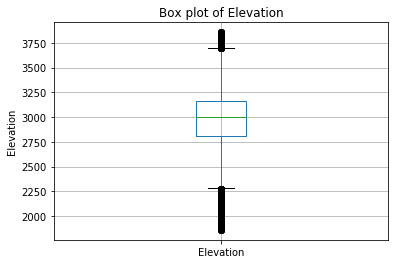

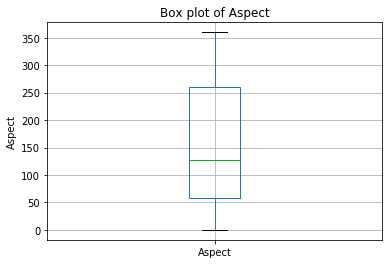

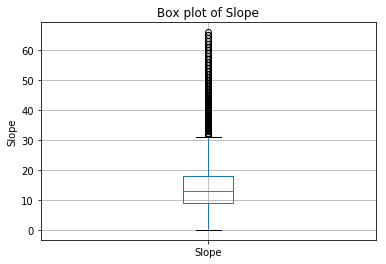

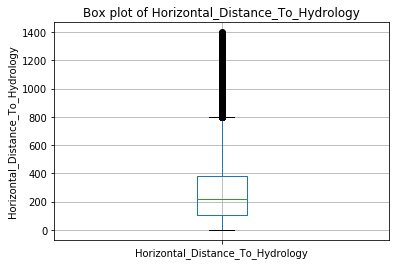

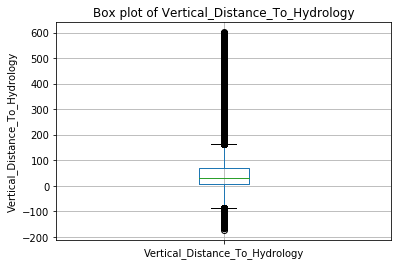

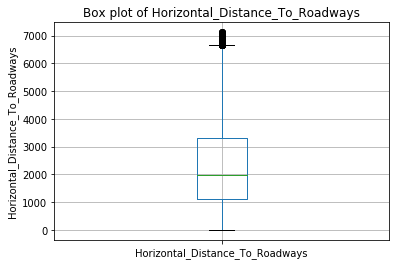

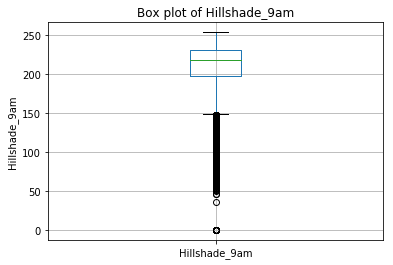

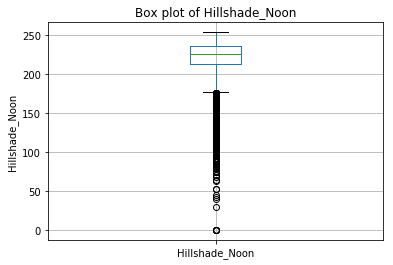

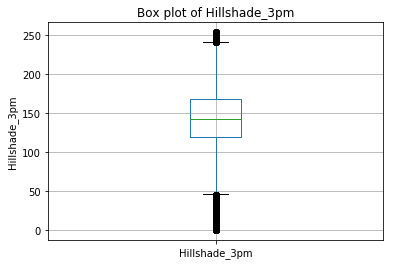

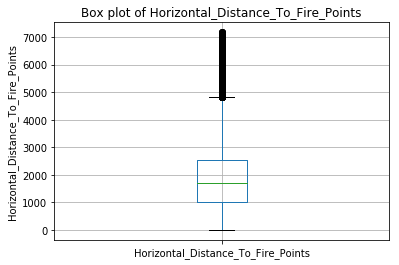

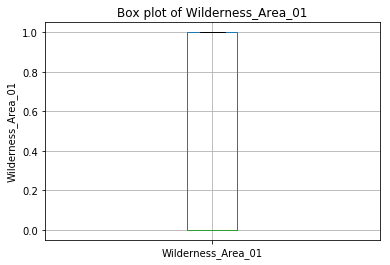

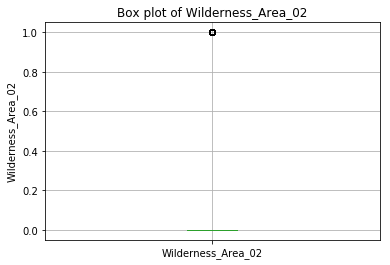

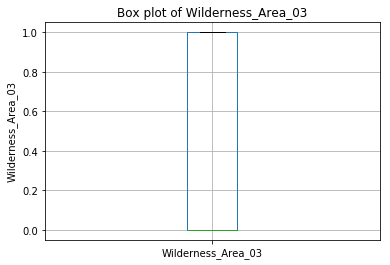

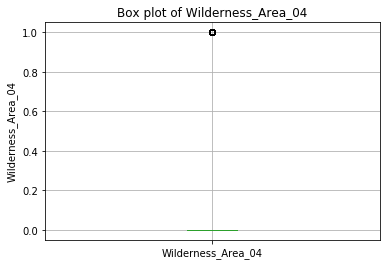

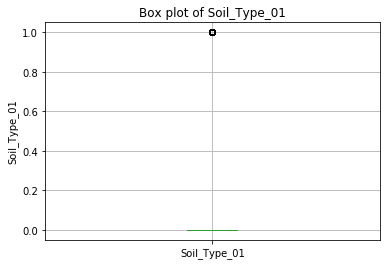

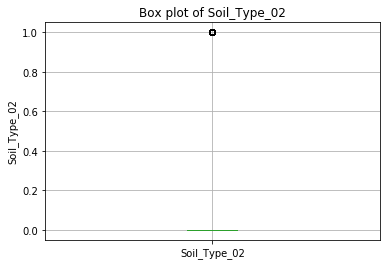

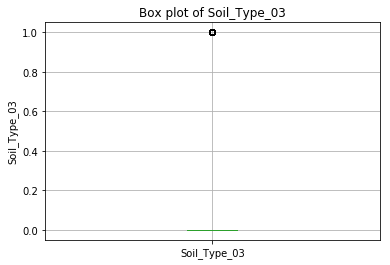

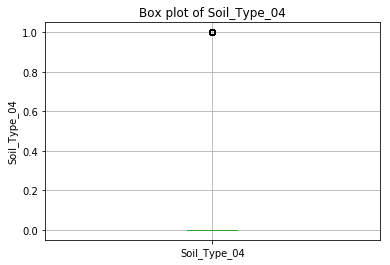

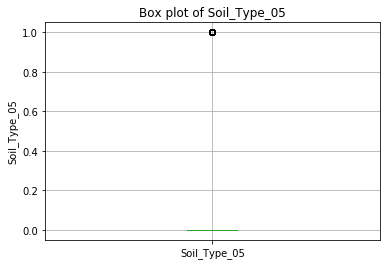

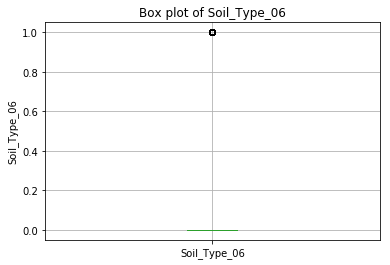

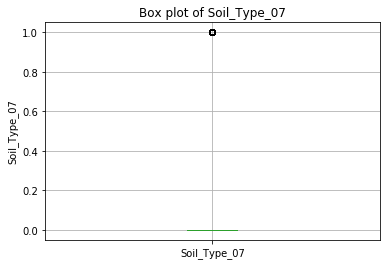

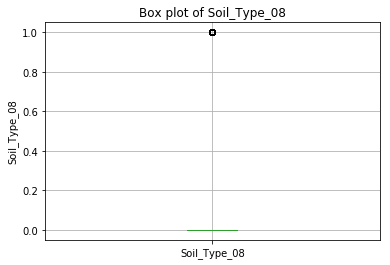

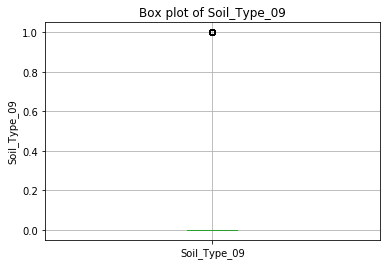

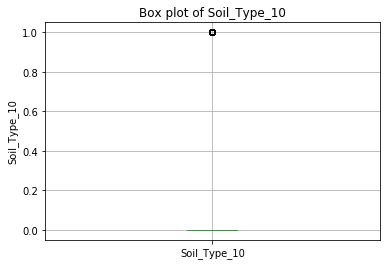

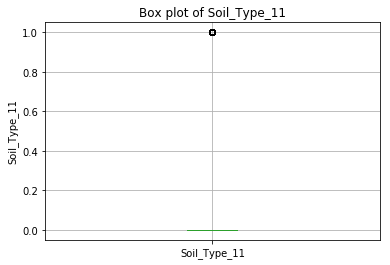

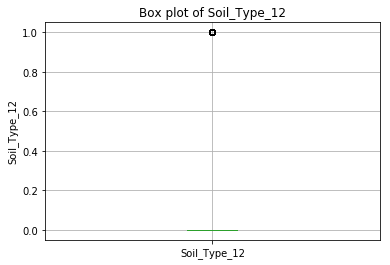

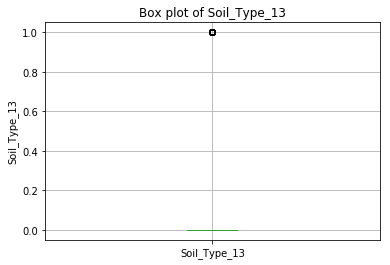

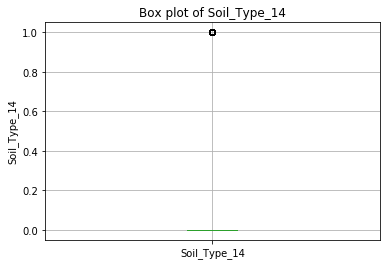

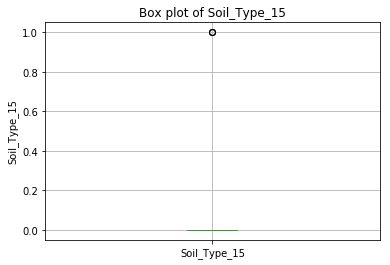

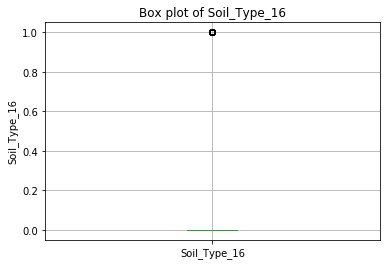

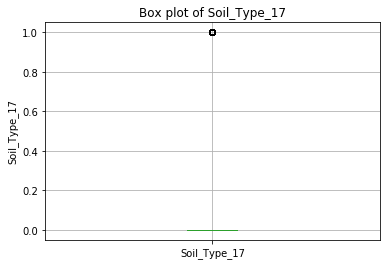

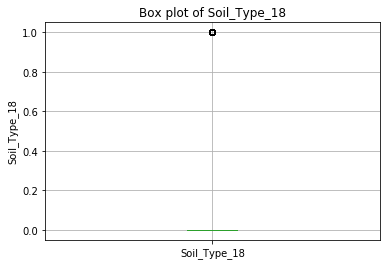

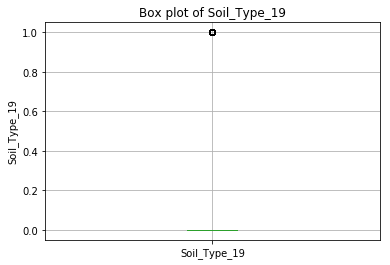

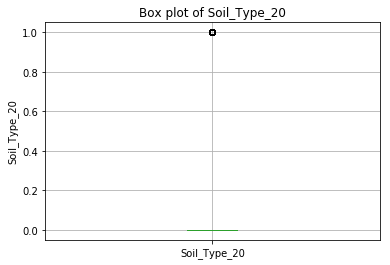

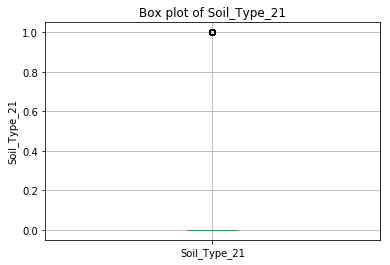

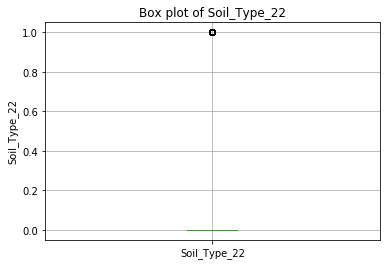

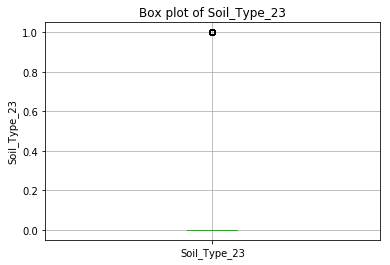

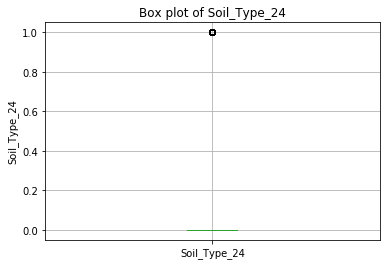

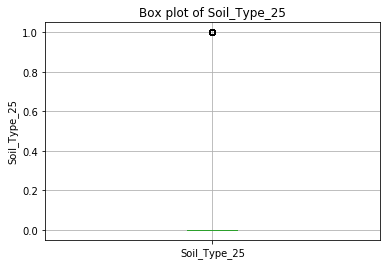

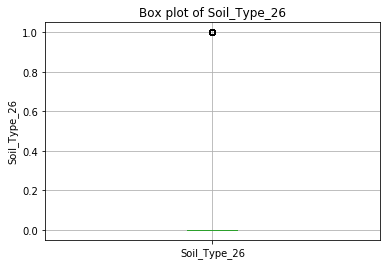

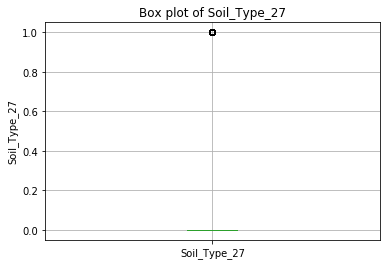

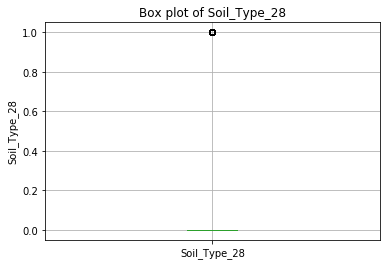

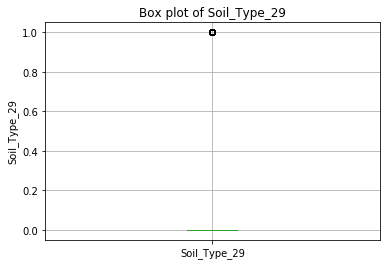

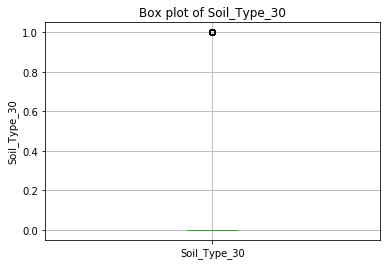

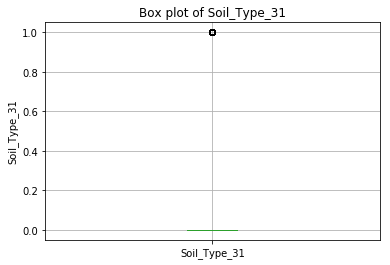

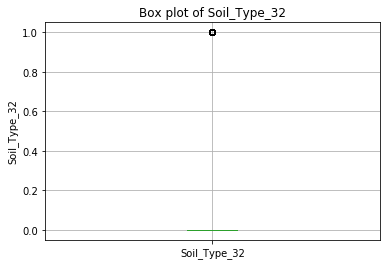

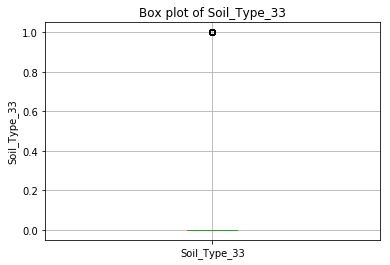

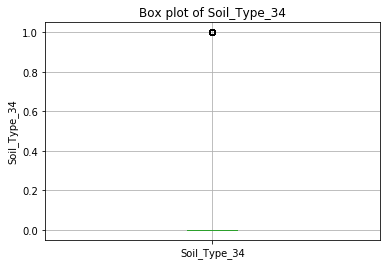

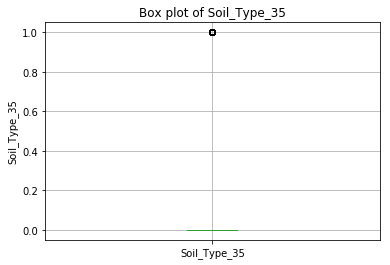

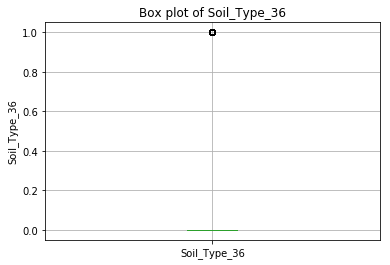

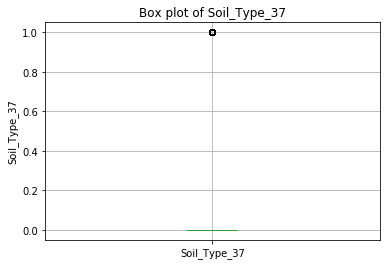

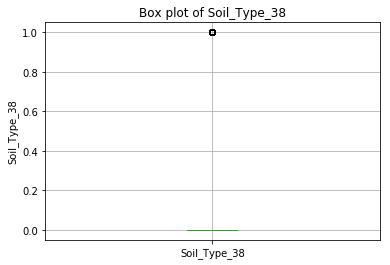

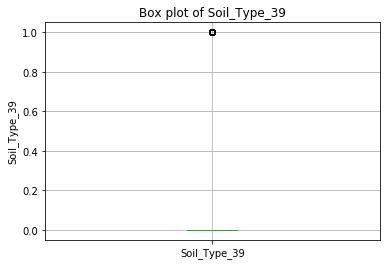

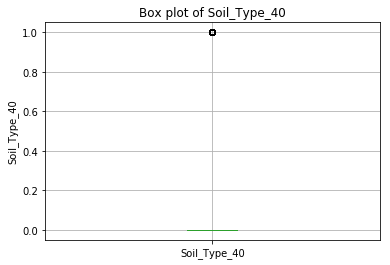

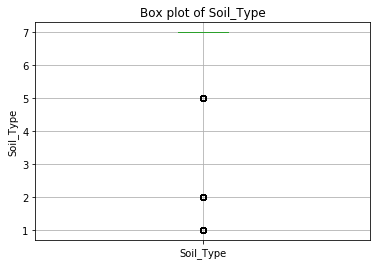

In [24]:
## BOXPLOT FOR NUMERICAL DATA EXPLORATION

for col in soil.columns:

    if (soil[col].dtype.name == 'int64'):
        title = 'Box plot of '+ col
        plt.figure(col)
        soil.boxplot(column=col)
        plt.title(title)
        plt.ylabel(col)       

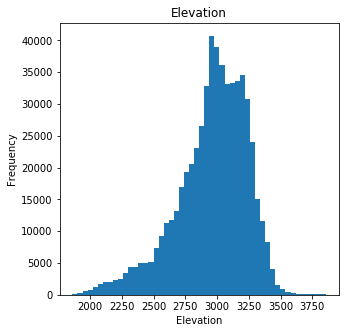

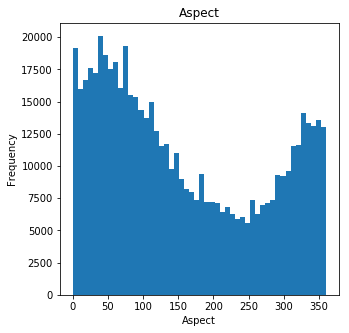

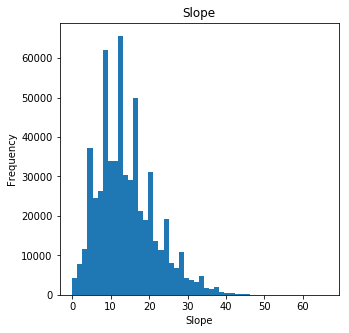

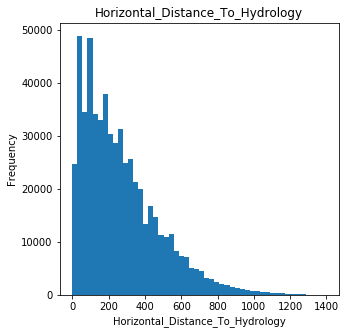

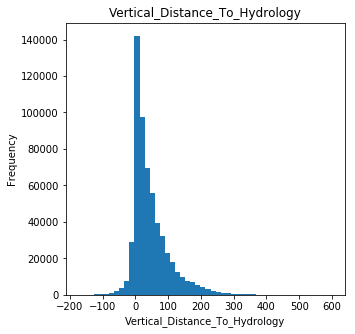

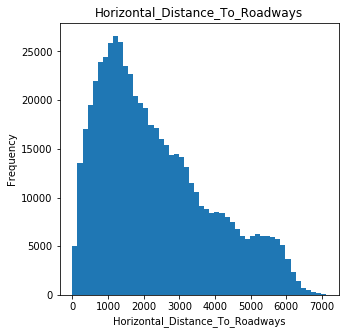

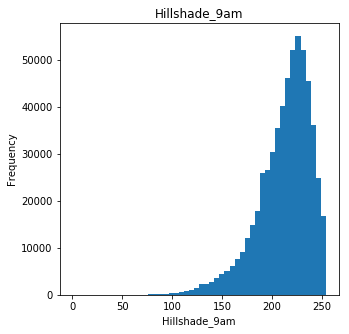

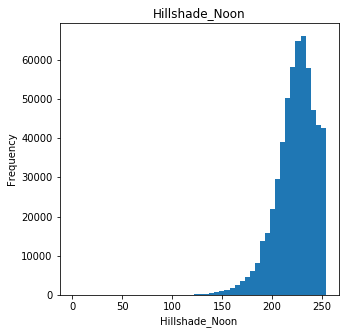

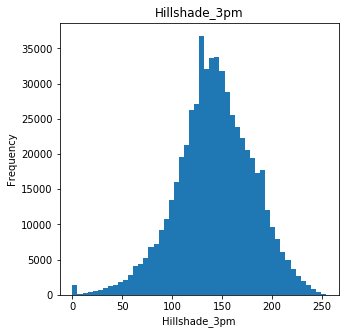

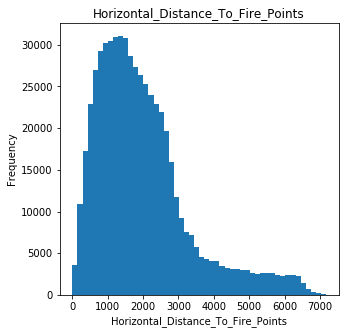

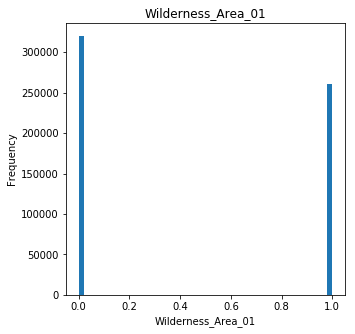

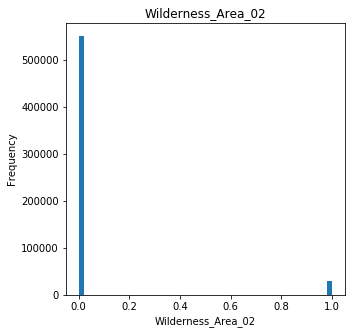

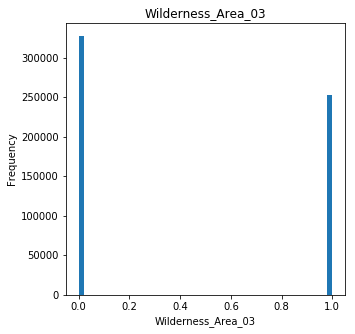

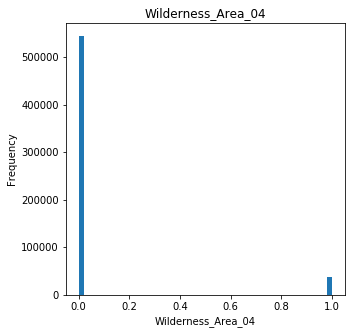

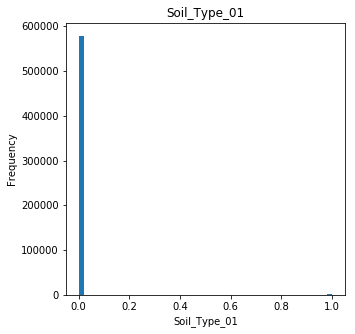

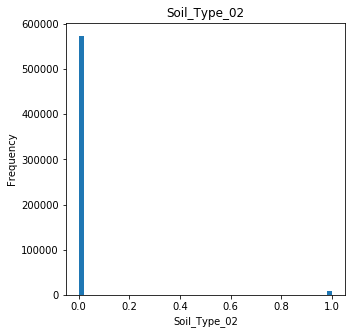

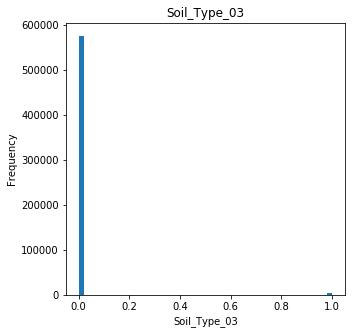

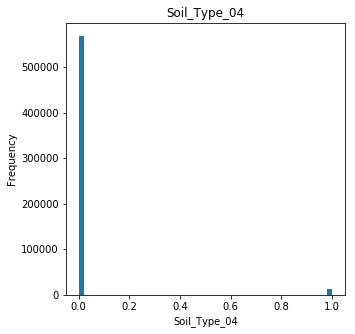

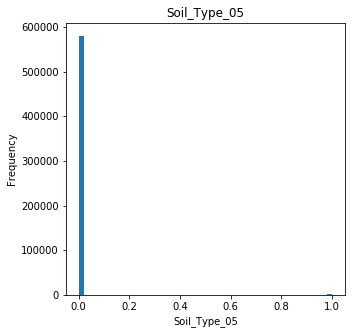

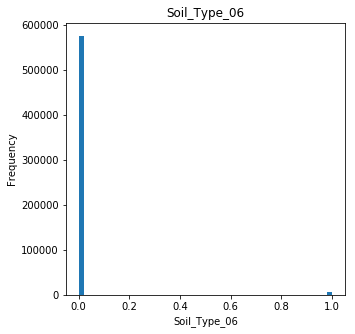

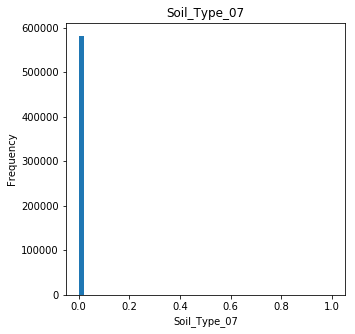

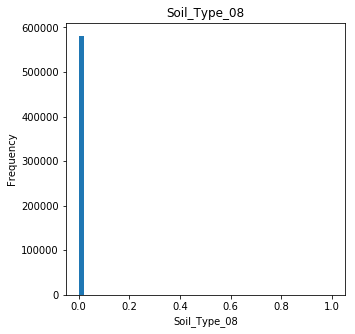

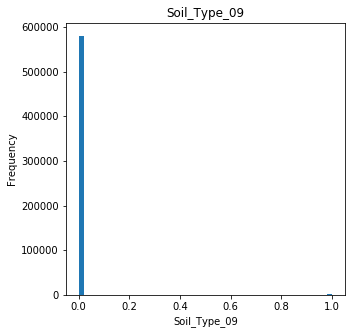

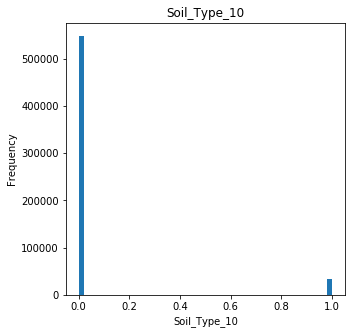

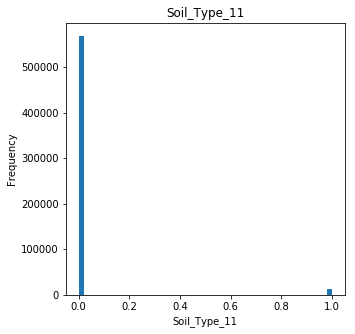

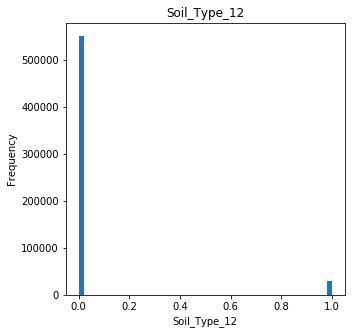

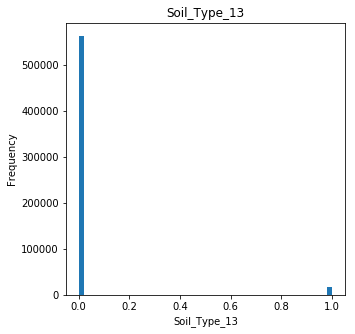

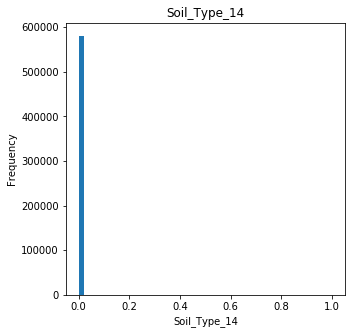

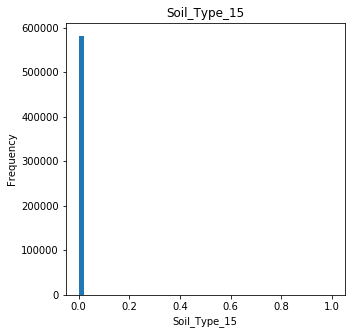

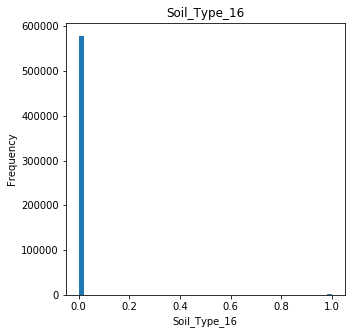

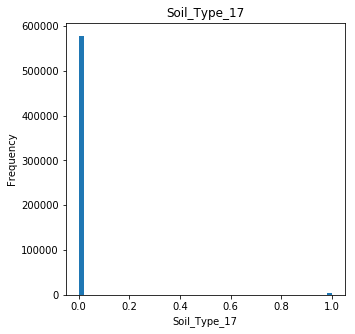

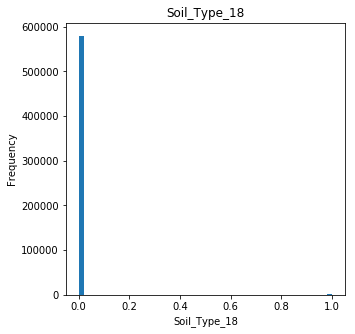

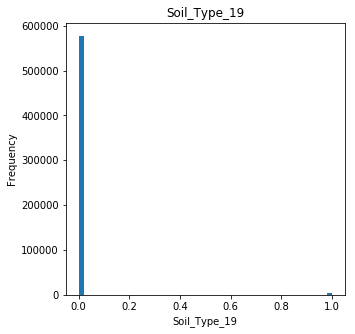

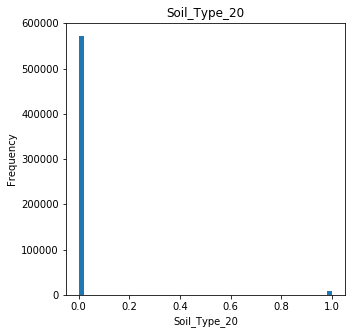

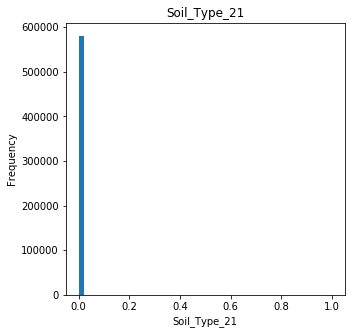

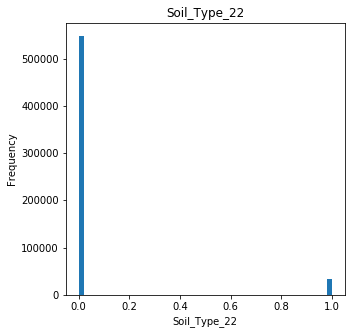

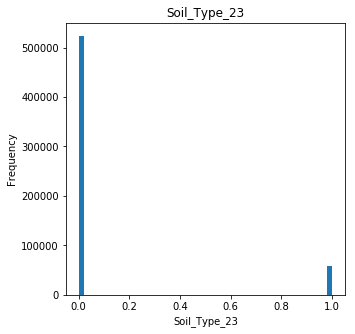

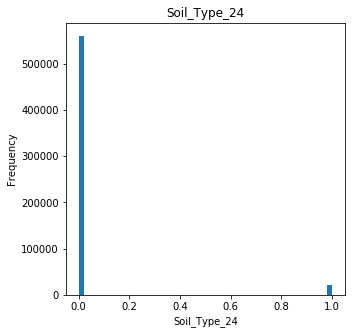

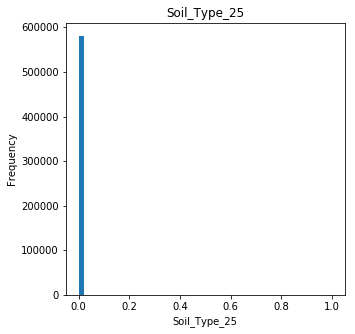

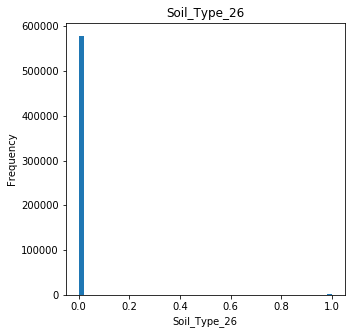

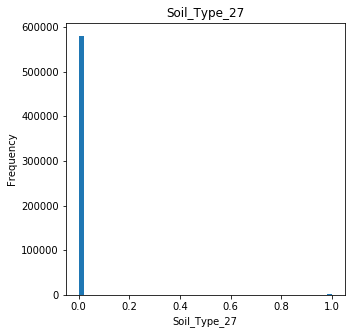

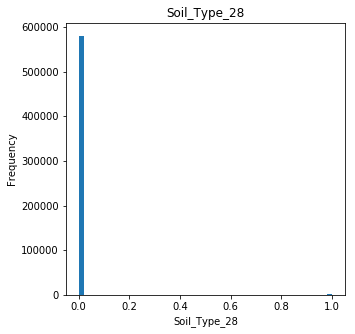

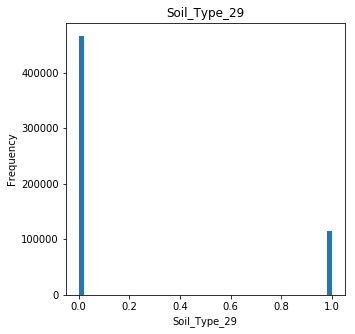

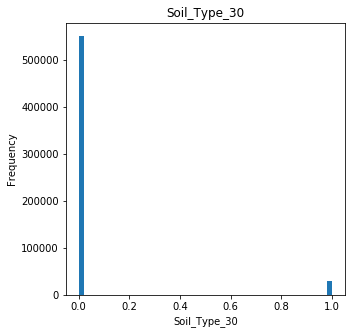

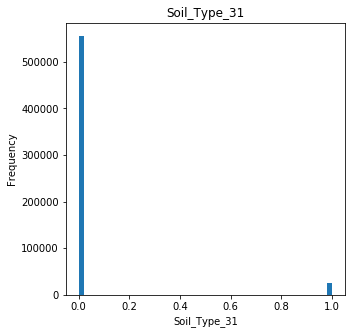

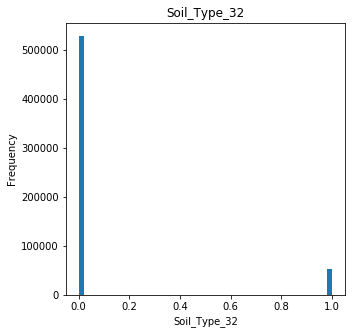

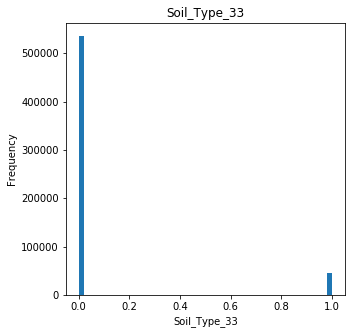

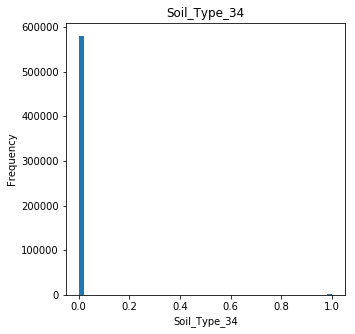

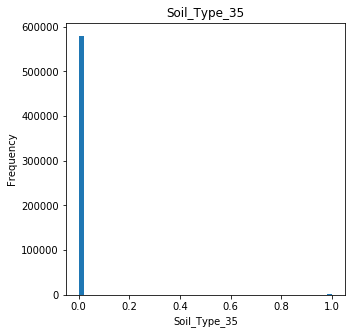

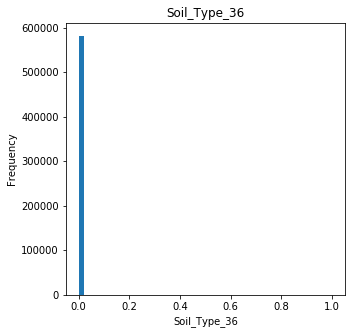

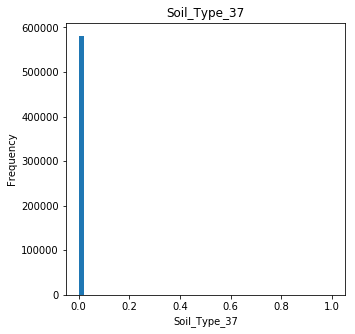

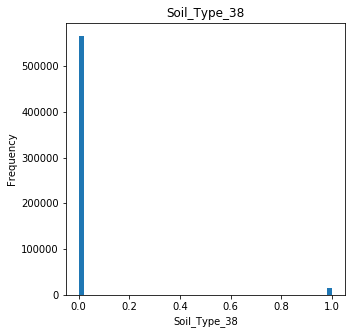

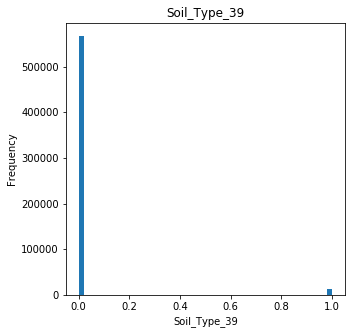

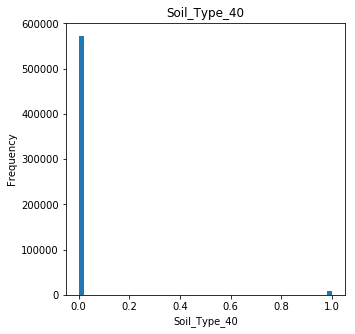

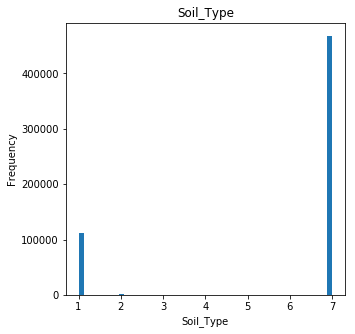

In [25]:
## HISTOGRAMS FOR NUMERICAL DATA EXPLORATION

for col in soil.columns:
    if (soil[col].dtype.name == 'int64'):
        plt.figure(figsize=(5, 5))
        soil[col].plot(kind='hist', bins=50)
        plt.title(col)
        plt.xlabel(col)
        axes = plt.gca()
        filename = str(soil[col].name)+"_distribution"
        plt.savefig(filename)
        plt.show()


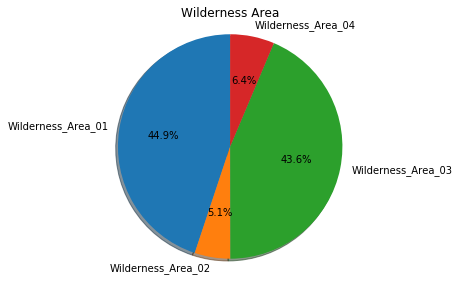

In [26]:
# TEMPORARILY CONVERT WILDERNESS AREA TO NUMERIC TO CREATE PIE CHART

soil_copy = soil.copy(deep=True)

columns = []
values = []

for pos in range(10,14):
    soil_copy[soil_copy.columns[pos]] = soil_copy[soil_copy.columns[pos]].astype('int64')
    columns.append(soil_copy.columns[pos])
    values.append(soil_copy[soil_copy.columns[pos]].sum())
    
plt.pie(values, autopct='%1.1f%%',shadow=True, labels=columns, startangle=90)
plt.axis('equal')
plt.title('Wilderness Area')
plt.tight_layout()
plt.show()

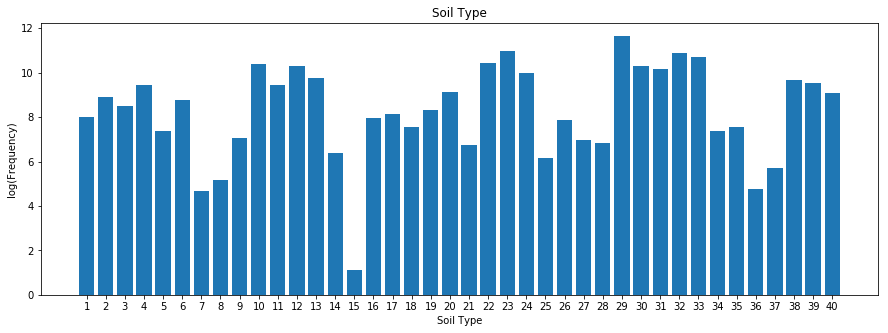

In [27]:
# TEMPORARILY CONVERT SOIL TYPE TO NUMERIC TO CREATE BAR CHART

soil_copy = soil.copy(deep=True)

columns = []
values = []

i = 1 

for pos in range(14,54):
    soil_copy[soil_copy.columns[pos]] = soil_copy[soil_copy.columns[pos]].astype('int64')
    columns.append(i)
    values.append(np.log(soil_copy[soil_copy.columns[pos]].sum()))
    i+=1
    
plt.bar(columns, values)
fig = plt.gcf()
fig.set_size_inches(15,5)
plt.title("Soil Type")
plt.xlabel('Soil Type')
plt.ylabel('log(Frequency)')
plt.xticks(columns)
plt.show()

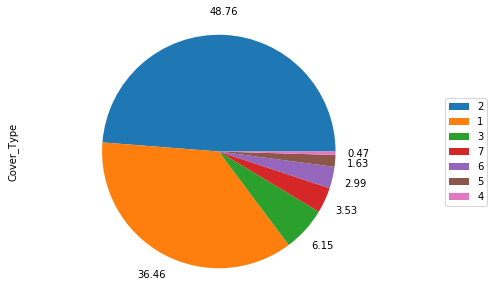

In [28]:
# PIE CHART OF COVER TYPE

soil['Cover_Type'].value_counts().plot(kind='pie',labels=None, autopct='%.2f', pctdistance=1.2)
plt.legend(labels = soil['Cover_Type'].value_counts().index, loc="right", bbox_to_anchor=(1.2, 0.5))
plt.axis('equal')
plt.tight_layout()
plt.show()

### A - EXPLORE PAIRS OF ATTRIBUTES

Text(0.5,1,'Elevation vs Slope')

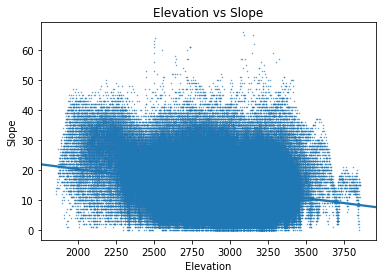

In [29]:
# Regression plot of Elevation vs Slope
sns.regplot(x="Elevation", y="Slope", data=soil, marker='o', scatter_kws={'s':0.2}).set_title('Elevation vs Slope')

Text(0.5,1,'Cover Type vs Elevation')

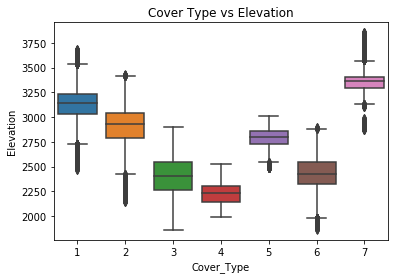

In [30]:
# Cover Type vs Elevation
sns.boxplot(x=soil["Cover_Type"], y=soil["Elevation"]).set_title('Cover Type vs Elevation')

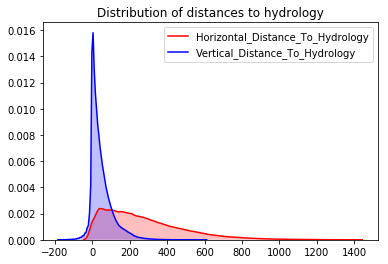

In [31]:
# Distribution of distances to hydrology

p1=sns.kdeplot(soil['Horizontal_Distance_To_Hydrology'], shade=True, color="r").set_title('Distribution of distances to hydrology')
p1=sns.kdeplot(soil['Vertical_Distance_To_Hydrology'], shade=True, color="b")

Text(0.5,1,'Aspect Ratio vs Hillshade Index at noon')

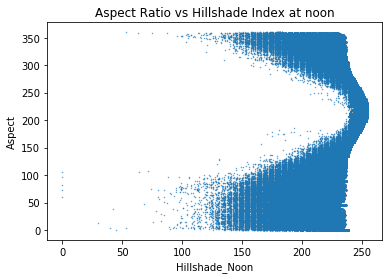

In [32]:
# Aspect Ratio vs Hillshade Index at noon

sns.regplot(x="Hillshade_Noon", y="Aspect", data=soil, marker='o', scatter_kws={'s':0.2}, fit_reg=False).set_title('Aspect Ratio vs Hillshade Index at noon')

Text(0.5,1,'Aspect Ratio vs Hillshade Index at 3pm')

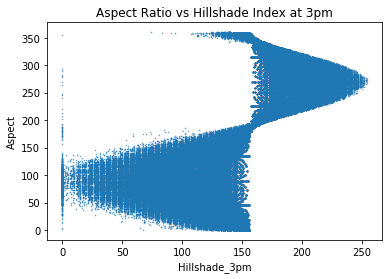

In [33]:
# Aspect Ratio vs Hillshade Index at 3pm

sns.regplot(x="Hillshade_3pm", y="Aspect", data=soil, marker='o', scatter_kws={'s':0.2}, fit_reg=False).set_title('Aspect Ratio vs Hillshade Index at 3pm')

Text(0.5,1,'Aspect Ratio vs Hillshade Index at 3pm')

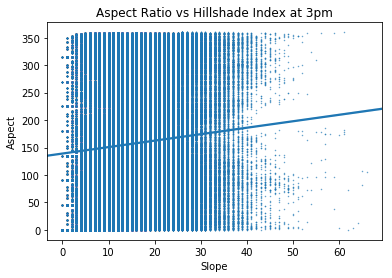

In [34]:
# Aspect Ratio vs Hillshade Index at 3pm

sns.regplot(x="Slope", y="Aspect", data=soil, marker='o', scatter_kws={'s':0.2}).set_title('Aspect Ratio vs Hillshade Index at 3pm')

In [35]:
soil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 57 columns):
Elevation                             581012 non-null int64
Aspect                                581012 non-null int64
Slope                                 581012 non-null int64
Horizontal_Distance_To_Hydrology      581012 non-null int64
Vertical_Distance_To_Hydrology        581012 non-null int64
Horizontal_Distance_To_Roadways       581012 non-null int64
Hillshade_9am                         581012 non-null int64
Hillshade_Noon                        581012 non-null int64
Hillshade_3pm                         581012 non-null int64
Horizontal_Distance_To_Fire_Points    581012 non-null int64
Wilderness_Area_01                    581012 non-null int64
Wilderness_Area_02                    581012 non-null int64
Wilderness_Area_03                    581012 non-null int64
Wilderness_Area_04                    581012 non-null int64
Soil_Type_01                          581012 non-

Text(0.5,1,'Elevation vs Vertical Distance To Land Water Feature (Hyrdology)')

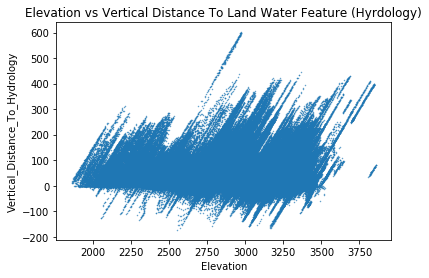

In [36]:
# Vertical Distance to Hyrdology vs Elevation

sns.regplot(x="Elevation", y="Vertical_Distance_To_Hydrology", data=soil, marker='o', scatter_kws={'s':0.2}, fit_reg=False).set_title('Elevation vs Vertical Distance To Land Water Feature (Hyrdology)')

Text(0.5,1,'Elevation vs Horizontal Distance To Roadways')

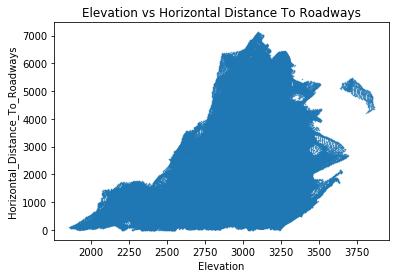

In [37]:
# Vertical Distance to Hyrdology vs Elevation

sns.regplot(x="Elevation", y="Horizontal_Distance_To_Roadways", data=soil, marker='o', scatter_kws={'s':0.2}, fit_reg=False).set_title('Elevation vs Horizontal Distance To Roadways')

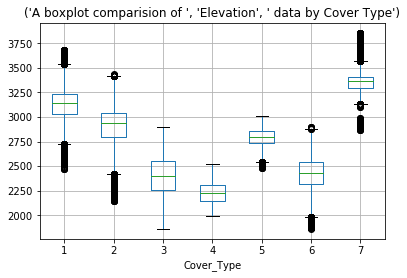

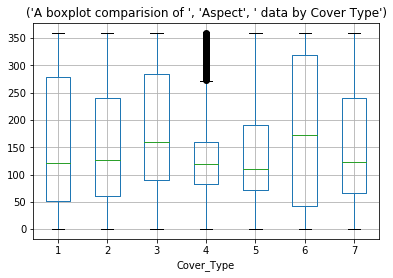

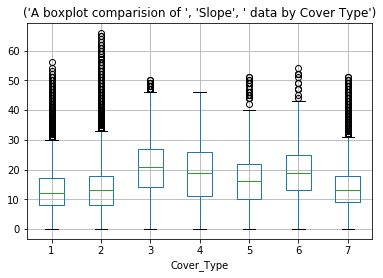

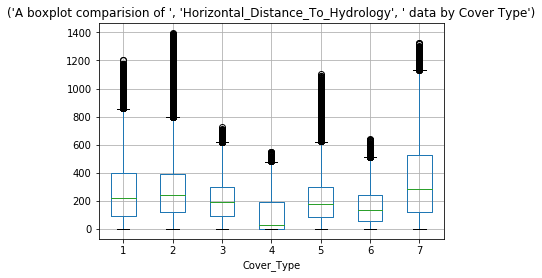

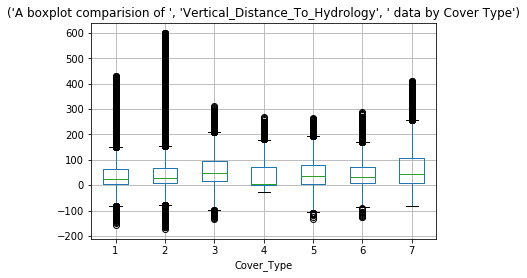

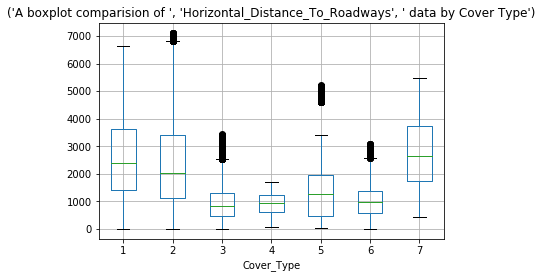

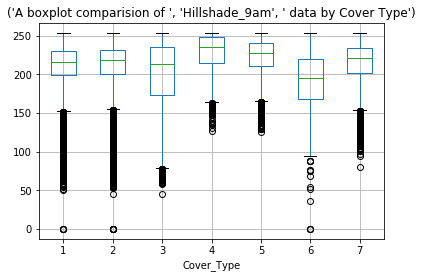

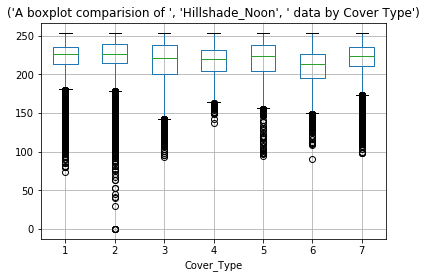

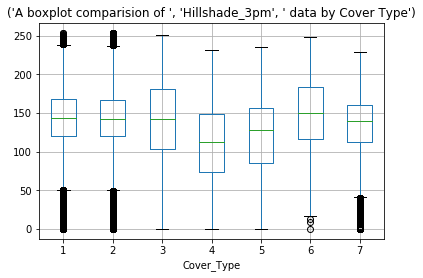

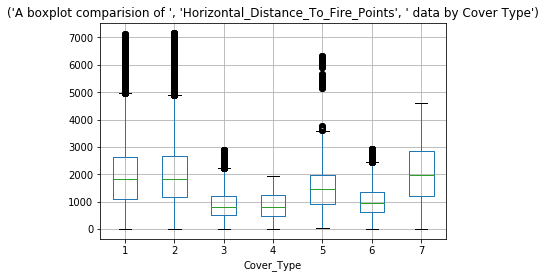

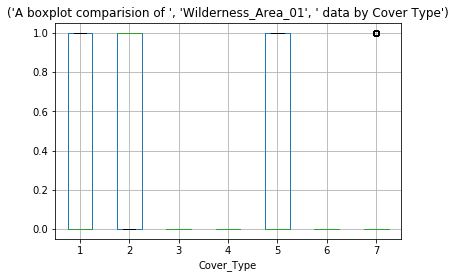

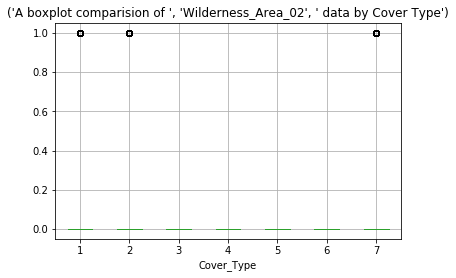

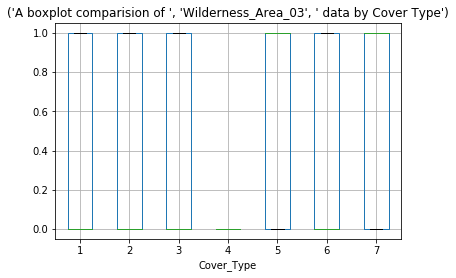

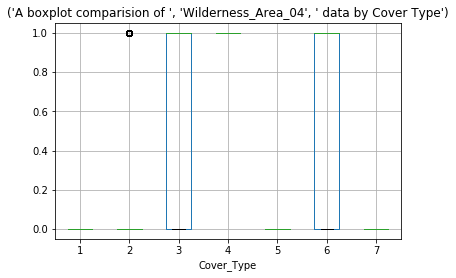

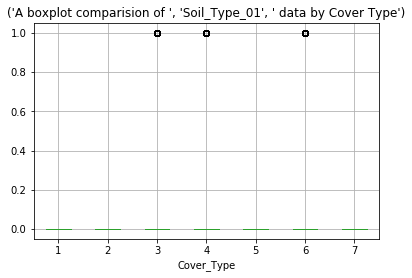

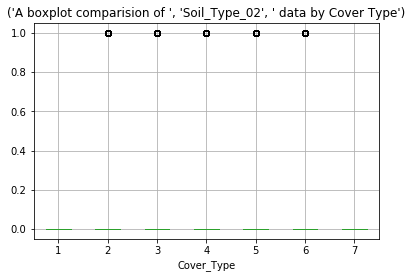

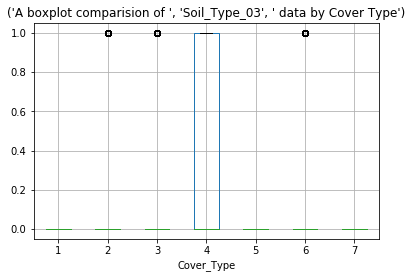

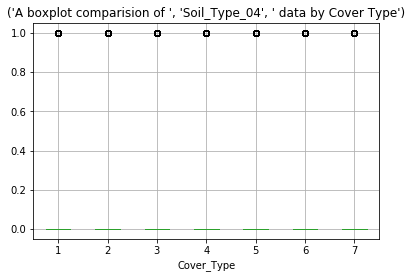

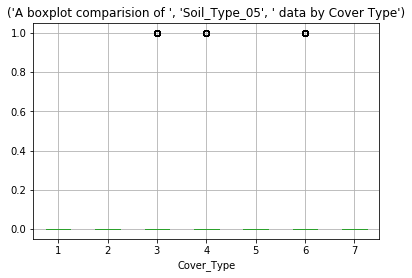

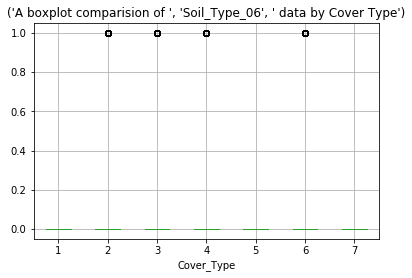

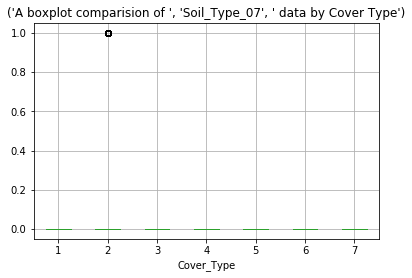

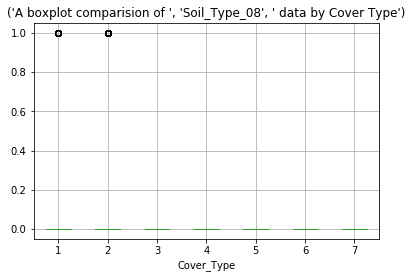

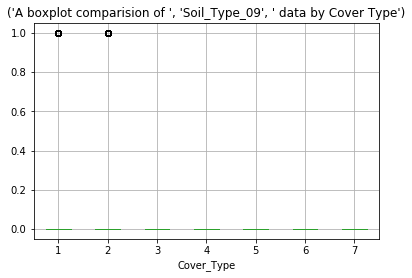

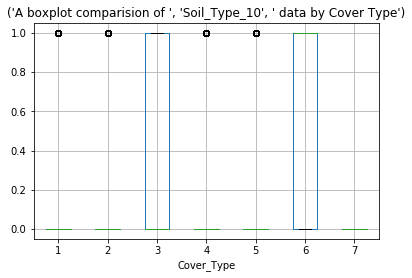

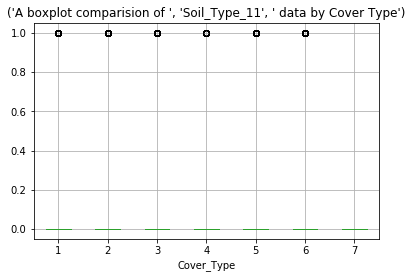

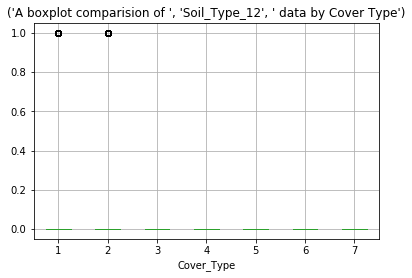

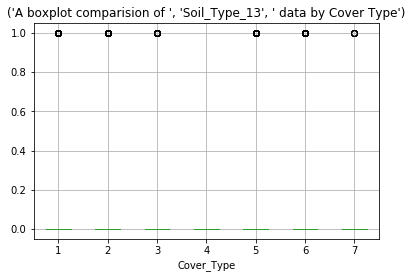

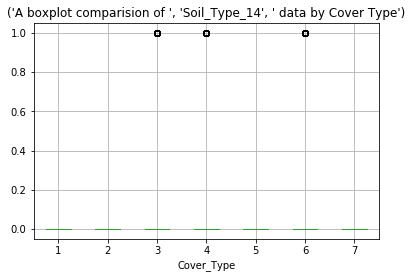

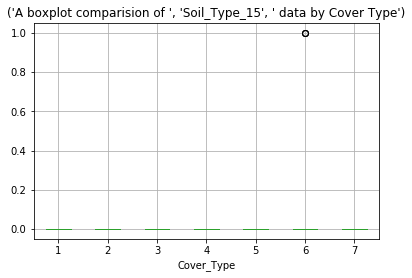

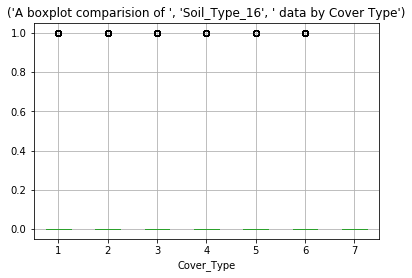

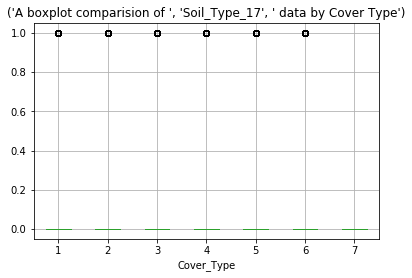

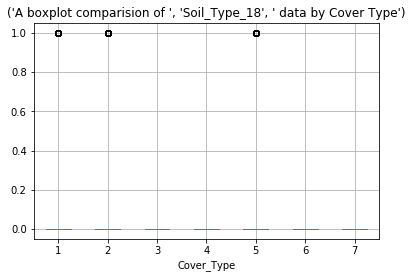

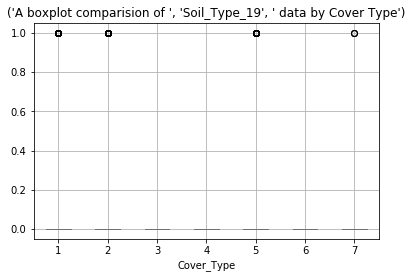

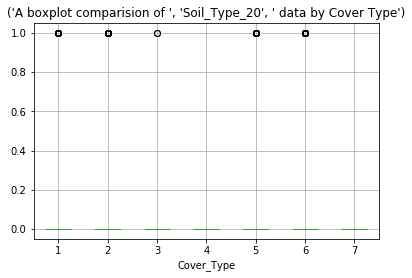

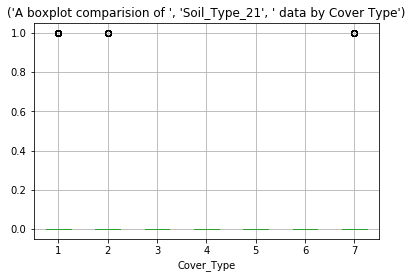

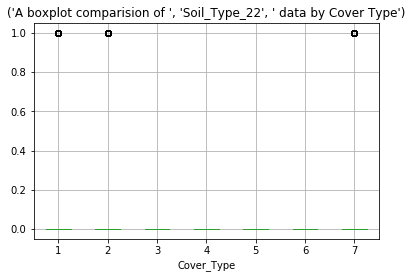

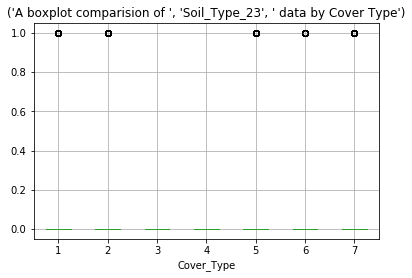

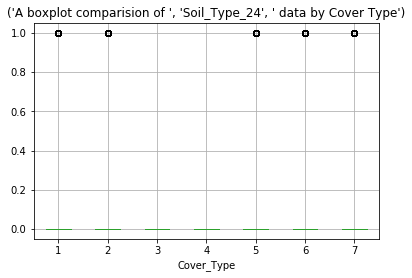

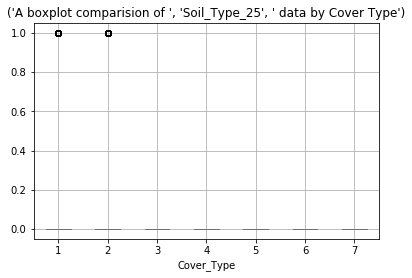

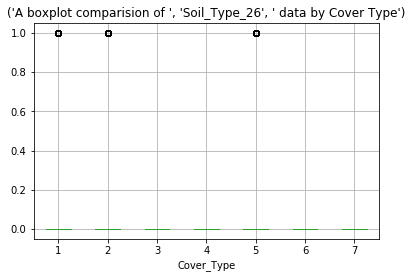

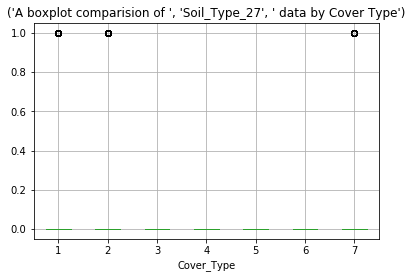

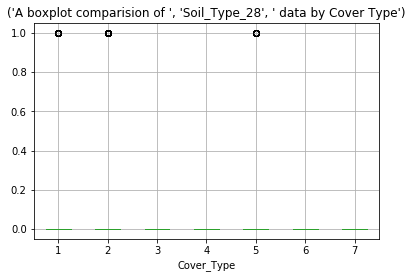

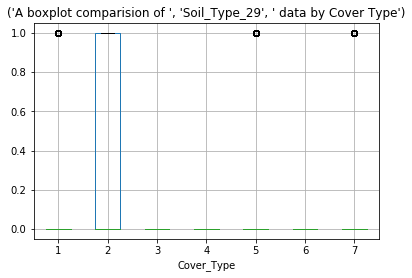

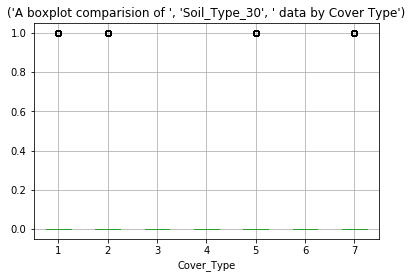

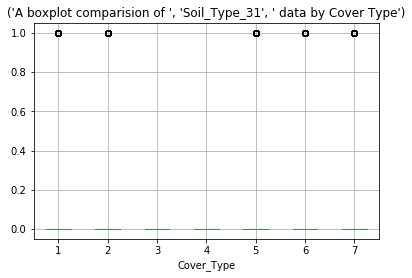

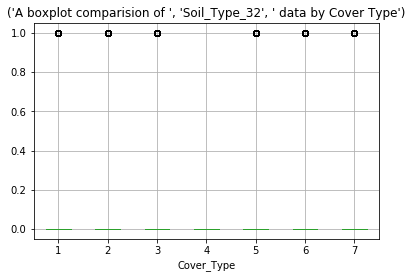

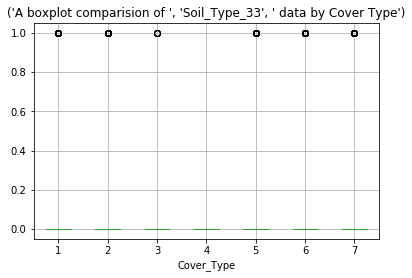

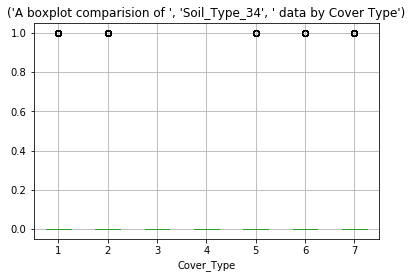

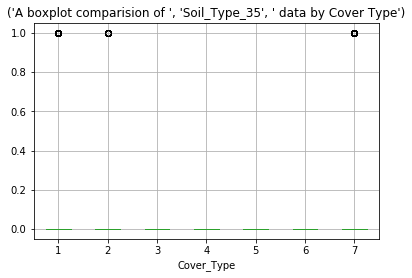

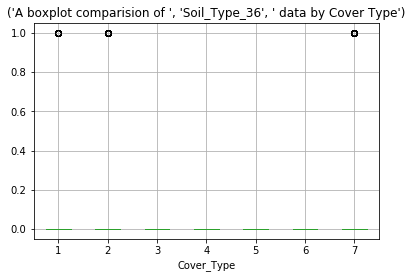

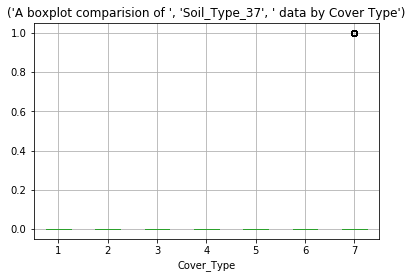

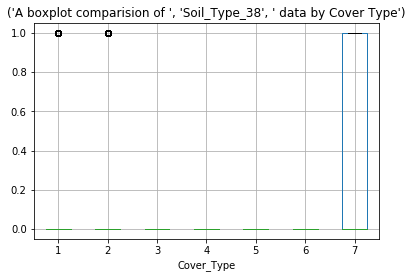

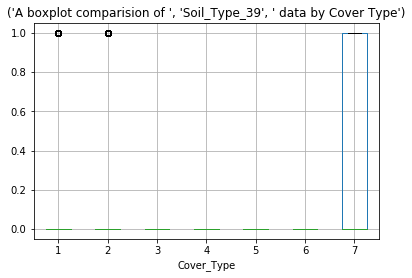

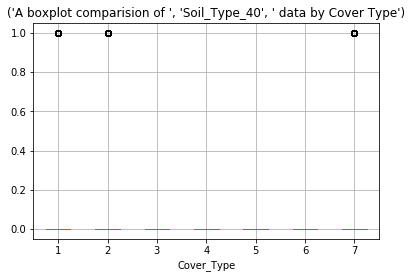

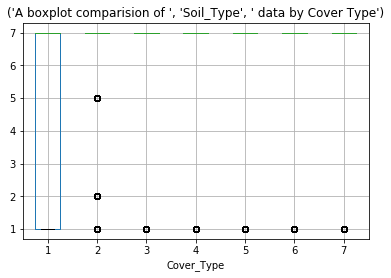

In [38]:
# All numerical variables grouped by the covertype class

for col in soil.columns:
    if (soil[col].dtype.name  == 'int64'):
        plt.figure(col,figsize=(30, 30))
        #title=["A boxplot comparision of the elevation data by covertype","A boxplot comparision of the aspect data by covertype","A boxplot comparision of the slope data by covertype","A boxplot comparision of the horizontal distance to land water by the covertype class", "A boxplot comparision of the vertical distance to land water by covertype","A boxplot comparision of the horizontal distance to roadways by covertype","A boxplot comparision of the hillshade at 9am by covertype", "A boxplot comparision of the hillshade at noon by covertype","A boxplot comparision of the hillshade at 3pm by covertype", "A boxplot comparision of the horizontal distance to fire points by covertype"]
        titles = "A boxplot comparision of ",col, " data by Cover Type"
        index = soil.columns.get_loc(col)
        soil.boxplot(column=col, by="Cover_Type")
        plt.title(titles)
        #plt.title(title[index], fontsize=10)
        plt.suptitle("")
        filetitle="boxplot_"+str(soil[col].name)+"_byCovertype.png"
        plt.savefig(filetitle)
        plt.show()



In [39]:
# All numerical variables grouped wilderness area
# Code not finished yet. I want to see breakdowns of each Wilderness area (maybe as boxplot?)


In [40]:
# Below takes long to process- run last

In [41]:
#from pandas.plotting import scatter_matrix
#scatter_matrix(soil,alpha=0.2,figsize=(80, 80),diagonal='hist')

In [42]:
soil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 57 columns):
Elevation                             581012 non-null int64
Aspect                                581012 non-null int64
Slope                                 581012 non-null int64
Horizontal_Distance_To_Hydrology      581012 non-null int64
Vertical_Distance_To_Hydrology        581012 non-null int64
Horizontal_Distance_To_Roadways       581012 non-null int64
Hillshade_9am                         581012 non-null int64
Hillshade_Noon                        581012 non-null int64
Hillshade_3pm                         581012 non-null int64
Horizontal_Distance_To_Fire_Points    581012 non-null int64
Wilderness_Area_01                    581012 non-null int64
Wilderness_Area_02                    581012 non-null int64
Wilderness_Area_03                    581012 non-null int64
Wilderness_Area_04                    581012 non-null int64
Soil_Type_01                          581012 non-

In [43]:
soil_features_selected = soil[['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm','Cover_Type','Wilderness_Type','Soil_Type']]

In [44]:
soil_features_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 12 columns):
Elevation                           581012 non-null int64
Aspect                              581012 non-null int64
Slope                               581012 non-null int64
Horizontal_Distance_To_Hydrology    581012 non-null int64
Vertical_Distance_To_Hydrology      581012 non-null int64
Horizontal_Distance_To_Roadways     581012 non-null int64
Hillshade_9am                       581012 non-null int64
Hillshade_Noon                      581012 non-null int64
Hillshade_3pm                       581012 non-null int64
Cover_Type                          581012 non-null category
Wilderness_Type                     581012 non-null category
Soil_Type                           581012 non-null int64
dtypes: category(2), int64(10)
memory usage: 45.4 MB


In [45]:
soil_set_wild1_mask = soil_features_selected['Wilderness_Type'] == 1

In [46]:
soil_set_wild1_mask.value_counts()

False    320216
True     260796
Name: Wilderness_Type, dtype: int64

In [47]:
soil_set_wild1 = soil_features_selected.loc[soil_set_wild1_mask]

In [48]:
soil_set_wild1.shape

(260796, 12)

In [49]:
soil_set_wild1.dtypes

Elevation                              int64
Aspect                                 int64
Slope                                  int64
Horizontal_Distance_To_Hydrology       int64
Vertical_Distance_To_Hydrology         int64
Horizontal_Distance_To_Roadways        int64
Hillshade_9am                          int64
Hillshade_Noon                         int64
Hillshade_3pm                          int64
Cover_Type                          category
Wilderness_Type                     category
Soil_Type                              int64
dtype: object

In [50]:
soil_set_wild1

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Cover_Type,Wilderness_Type,Soil_Type
0,2596,51,3,258,0,510,221,232,148,5,1,7
1,2590,56,2,212,-6,390,220,235,151,5,1,7
2,2804,139,9,268,65,3180,234,238,135,2,1,7
3,2785,155,18,242,118,3090,238,238,122,2,1,7
4,2595,45,2,153,-1,391,220,234,150,5,1,7
5,2579,132,6,300,-15,67,230,237,140,2,1,7
6,2606,45,7,270,5,633,222,225,138,5,1,7
7,2605,49,4,234,7,573,222,230,144,5,1,7
8,2617,45,9,240,56,666,223,221,133,5,1,7
9,2612,59,10,247,11,636,228,219,124,5,1,7


Text(0.5,1,'Elevation vs Horizontal Distance To Roadways')

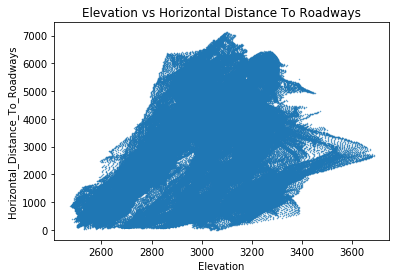

In [51]:
sns.regplot(x="Elevation", y="Horizontal_Distance_To_Roadways", data=soil_set_wild1, marker='o', scatter_kws={'s':0.2}, fit_reg=False).set_title('Elevation vs Horizontal Distance To Roadways')

In [52]:
for col in soil_set_wild1.columns:
    soil_set_wild1[col] = soil_set_wild1[col].astype('int64')

soil_set_wild1.dtypes

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Elevation                           int64
Aspect                              int64
Slope                               int64
Horizontal_Distance_To_Hydrology    int64
Vertical_Distance_To_Hydrology      int64
Horizontal_Distance_To_Roadways     int64
Hillshade_9am                       int64
Hillshade_Noon                      int64
Hillshade_3pm                       int64
Cover_Type                          int64
Wilderness_Type                     int64
Soil_Type                           int64
dtype: object

## TEST THESE TEN COMPARISONS IN EACH OF OUR MODELS

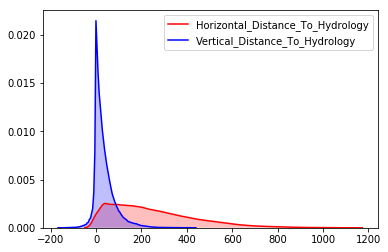

In [53]:
p1=sns.kdeplot(soil_set_wild1['Horizontal_Distance_To_Hydrology'], shade=True, color="r")
p1=sns.kdeplot(soil_set_wild1['Vertical_Distance_To_Hydrology'], shade=True, color="b")

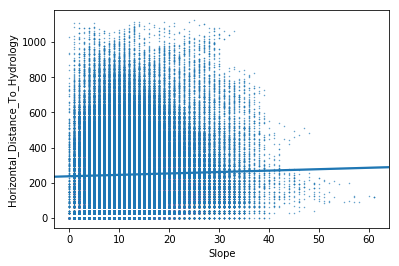

In [54]:
sns.regplot(x="Slope", y="Horizontal_Distance_To_Hydrology", data=soil_set_wild1, marker='o', scatter_kws={'s':0.2})

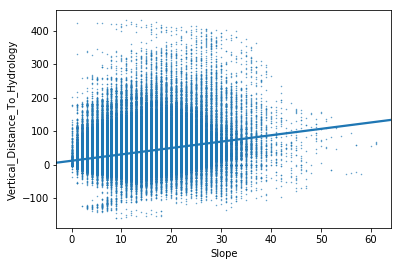

In [55]:
sns.regplot(x="Slope", y="Vertical_Distance_To_Hydrology", data=soil_set_wild1, marker='o', scatter_kws={'s':0.2})
#Relationship prsent

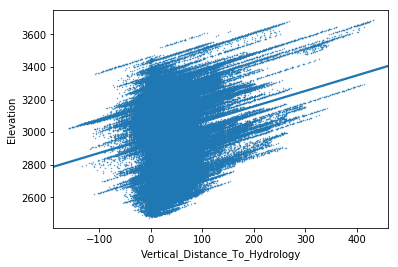

In [56]:
sns.regplot(x="Vertical_Distance_To_Hydrology", y="Elevation", data=soil_set_wild1, marker='o', scatter_kws={'s':0.2})
#Relationship prsent

#Banu to make sure to run kmeans

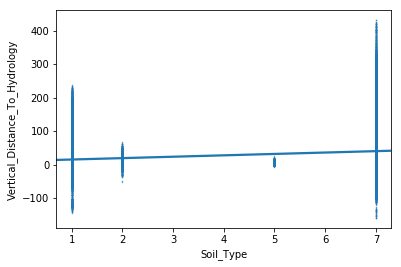

In [57]:
sns.regplot(x="Soil_Type", y="Vertical_Distance_To_Hydrology", data=soil_set_wild1, marker='o', scatter_kws={'s':0.2})
#Relationship prsent

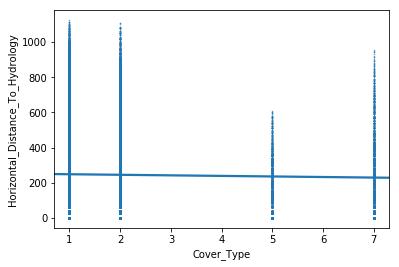

In [58]:
sns.regplot(x="Cover_Type", y="Horizontal_Distance_To_Hydrology", data=soil_set_wild1, marker='o', scatter_kws={'s':0.2})
#Relationship prsent

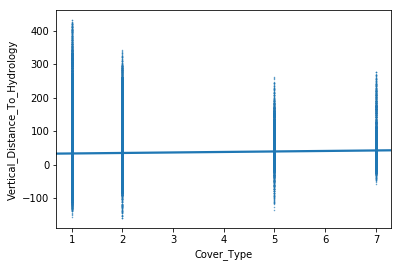

In [59]:
sns.regplot(x="Cover_Type", y="Vertical_Distance_To_Hydrology", data=soil_set_wild1, marker='o', scatter_kws={'s':0.2})
#Relationship prsent

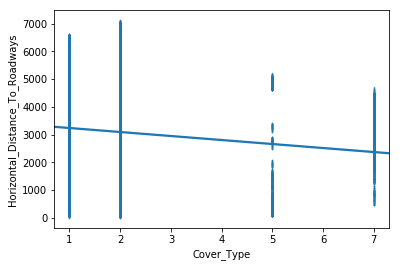

In [60]:
sns.regplot(x="Cover_Type", y="Horizontal_Distance_To_Roadways", data=soil_set_wild1, marker='o', scatter_kws={'s':0.2})
#Relationship prsent

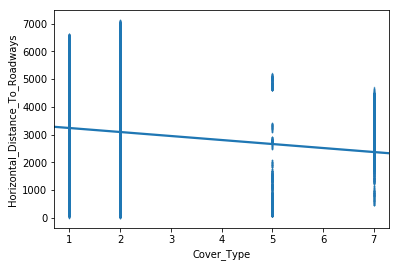

In [61]:
sns.regplot(x="Cover_Type", y="Horizontal_Distance_To_Roadways", data=soil_set_wild1, marker='o', scatter_kws={'s':0.2})

In [62]:
# Copy first 50,000 rows into a new dataframe
df_tr = soil_set_wild1.copy(deep=True)
#df_tr.drop(df_tr.index[50000:], inplace=True)

In [63]:
clmns = np.array(soil_set_wild1.columns)

In [64]:
print (clmns)

['Elevation' 'Aspect' 'Slope' 'Horizontal_Distance_To_Hydrology'
 'Vertical_Distance_To_Hydrology' 'Horizontal_Distance_To_Roadways'
 'Hillshade_9am' 'Hillshade_Noon' 'Hillshade_3pm' 'Cover_Type'
 'Wilderness_Type' 'Soil_Type']


In [65]:
#clmns = ['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways','Hillshade_9am', 'Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points']
df_tr_std = stats.zscore(df_tr[clmns])

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:2248: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


## GRAPH 1: Horizontal Distance to Hydrology vs Vertical Distance to Hydrology

['Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology']
   cluster_errors  num_clusters
0   521592.000000             1
1   258864.344009             2
2   176577.531505             3
3   140052.505733             4
4   112411.694636             5
5    95216.037168             6
6    82129.449252             7
7    73410.623410             8
8    65091.045909             9
9    58641.842806            10
cluster         0      1      2      3
Cover_Type                            
1           13928  58153   8535  25101
2           22008  71504  11559  41126
5              86   1934    401   1360
7             207   3036    531   1327


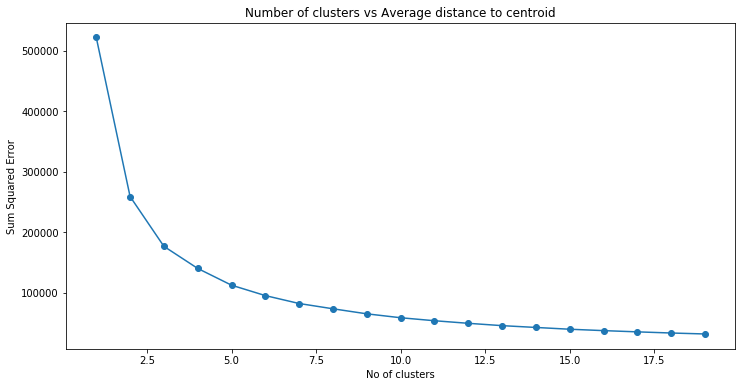

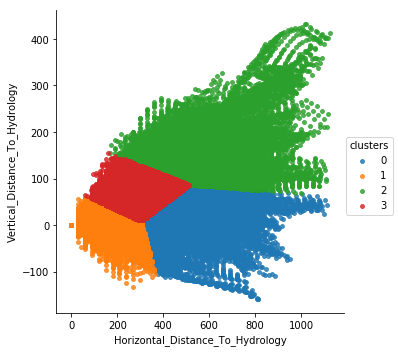

In [66]:
# Elevation and Aspect

current_clmns = []

col1 = 3 
col2 = 4 

current_clmns.append(clmns[col1])
current_clmns.append(clmns[col2])

print (current_clmns)

df_tr_std = stats.zscore(df_tr[current_clmns])

#Elbow curve

cluster_range  = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( df_tr_std )
  cluster_errors.append( clusters.inertia_ )

#Print Elbow curve table
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
print (clusters_df[0:10])

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.title("Number of clusters vs Average distance to centroid")
plt.xlabel('No of clusters')
plt.ylabel('Sum Squared Error')

# Cluster the data based on best k
kmeans = KMeans(n_clusters=4, random_state=5).fit(df_tr_std)
labels = kmeans.labels_

#Glue back to original data
df_tr['clusters'] = labels

#Add the column into our list
current_clmns.extend(['clusters'])

#Lets analyze the clusters
#Find out how many instances in cluster
#print (df_tr[current_clmns].groupby(['clusters']).mean())

# Plot the graph
sns.lmplot(current_clmns[0], current_clmns[1], 
       data=df_tr, 
       fit_reg=False, 
       hue="clusters",  
       scatter_kws={"marker": "D", 
                    "s": 15})

# Confusion Matrix Result

model = cluster.KMeans(n_clusters = 4, random_state=5)

fit = model.fit(df_tr_std)
df_tr["cluster"] = fit.predict(df_tr_std)

#Then, we create the following two columns, to compare the predicted labels with the target labels. 
df_tr["c"] = "count"

# The following line includes three parts: we first select the cluster, target, and c columns. Then, we group them by the cluster and target columns. Finally, we aggregate the rows of the group with a simple count function. 

# Print confusion matrix
clustering_result = df_tr[["cluster", "Cover_Type", "c"]].groupby(["cluster", "Cover_Type"]).agg("count")
confusion_matrix = (clustering_result.reset_index().pivot_table(index='Cover_Type', columns='cluster', values='c', aggfunc='sum', fill_value=0))
print (confusion_matrix)

## GRAPH 2: Slope vs Horizontal Distance to Hydrology

['Slope', 'Horizontal_Distance_To_Hydrology']
   cluster_errors  num_clusters
0   521592.000000             1
1   345303.051306             2
2   208540.060638             3
3   168273.801150             4
4   135240.392217             5
5   113813.839463             6
6    99887.482046             7
7    88604.628950             8
8    78757.638395             9
9    71843.353122            10
cluster         0      1      2      3      4
Cover_Type                                   
1           31367  13094  28060  13050  20146
2           36865  12512  39707  18168  38945
5             644   1842   1026     88    181
7            1504    866   1674    481    576


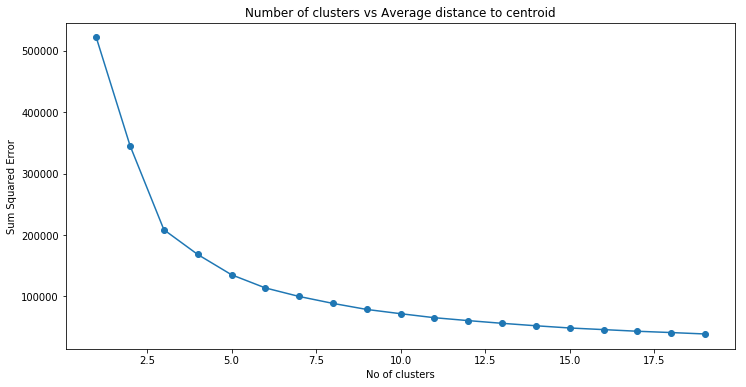

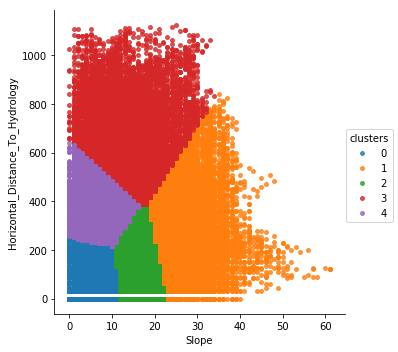

In [67]:
current_clmns = []

col1 = 2
col2 = 3

current_clmns.append(clmns[col1])
current_clmns.append(clmns[col2])

print (current_clmns)

df_tr_std = stats.zscore(df_tr[current_clmns])

#Elbow curve

cluster_range  = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( df_tr_std )
  cluster_errors.append( clusters.inertia_ )

#Print Elbow curve table
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
print (clusters_df[0:10])

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.title("Number of clusters vs Average distance to centroid")
plt.xlabel('No of clusters')
plt.ylabel('Sum Squared Error')

# Cluster the data based on best k
kmeans = KMeans(n_clusters=5, random_state=5).fit(df_tr_std)
labels = kmeans.labels_

#Glue back to original data
df_tr['clusters'] = labels

#Add the column into our list
current_clmns.extend(['clusters'])

#Lets analyze the clusters
#Find out how many instances in cluster
#print (df_tr[current_clmns].groupby(['clusters']).mean())

# Plot the graph
sns.lmplot(current_clmns[0], current_clmns[1], 
       data=df_tr, 
       fit_reg=False, 
       hue="clusters",  
       scatter_kws={"marker": "D", 
                    "s": 15})

# Confusion Matrix Result

model = cluster.KMeans(n_clusters = 5, random_state=5)

fit = model.fit(df_tr_std)
df_tr["cluster"] = fit.predict(df_tr_std)

#Then, we create the following two columns, to compare the predicted labels with the target labels. 
df_tr["c"] = "count"

# The following line includes three parts: we first select the cluster, target, and c columns. Then, we group them by the cluster and target columns. Finally, we aggregate the rows of the group with a simple count function. 

# Print confusion matrix
clustering_result = df_tr[["cluster", "Cover_Type", "c"]].groupby(["cluster", "Cover_Type"]).agg("count")
confusion_matrix = (clustering_result.reset_index().pivot_table(index='Cover_Type', columns='cluster', values='c', aggfunc='sum', fill_value=0))
print (confusion_matrix)

## GRAPH 3: Slope vs Vertical Distance to Hydrology

['Slope', 'Vertical_Distance_To_Hydrology']
   cluster_errors  num_clusters
0   521592.000000             1
1   312995.423236             2
2   218351.249654             3
3   175987.811219             4
4   138531.387523             5
5   122002.704997             6
6   107280.113389             7
7    95569.616520             8
8    85502.935071             9
9    79163.300096            10
cluster         0      1      2      3     4
Cover_Type                                  
1           31119  15508  40182  13249  5659
2           43364  28107  55224  13216  6286
5             846    229    655   1548   503
7            1640    660   1561    839   401


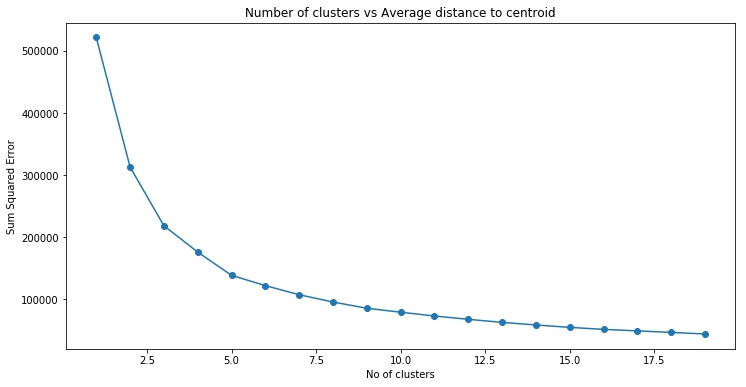

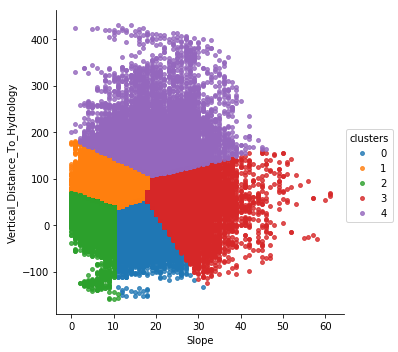

In [68]:
current_clmns = []

col1 = 2
col2 = 4

current_clmns.append(clmns[col1])
current_clmns.append(clmns[col2])

print (current_clmns)

df_tr_std = stats.zscore(df_tr[current_clmns])

#Elbow curve

cluster_range  = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( df_tr_std )
  cluster_errors.append( clusters.inertia_ )

#Print Elbow curve table
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
print (clusters_df[0:10])

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.title("Number of clusters vs Average distance to centroid")
plt.xlabel('No of clusters')
plt.ylabel('Sum Squared Error')

# Cluster the data based on best k
kmeans = KMeans(n_clusters=5, random_state=5).fit(df_tr_std)
labels = kmeans.labels_

#Glue back to original data
df_tr['clusters'] = labels

#Add the column into our list
current_clmns.extend(['clusters'])

#Lets analyze the clusters
#Find out how many instances in cluster
#print (df_tr[current_clmns].groupby(['clusters']).mean())

# Plot the graph
sns.lmplot(current_clmns[0], current_clmns[1], 
       data=df_tr, 
       fit_reg=False, 
       hue="clusters",  
       scatter_kws={"marker": "D", 
                    "s": 15})

# Confusion Matrix Result

model = cluster.KMeans(n_clusters = 5, random_state=5)

fit = model.fit(df_tr_std)
df_tr["cluster"] = fit.predict(df_tr_std)

#Then, we create the following two columns, to compare the predicted labels with the target labels. 
df_tr["c"] = "count"

# The following line includes three parts: we first select the cluster, target, and c columns. Then, we group them by the cluster and target columns. Finally, we aggregate the rows of the group with a simple count function. 

# Print confusion matrix
clustering_result = df_tr[["cluster", "Cover_Type", "c"]].groupby(["cluster", "Cover_Type"]).agg("count")
confusion_matrix = (clustering_result.reset_index().pivot_table(index='Cover_Type', columns='cluster', values='c', aggfunc='sum', fill_value=0))
print (confusion_matrix)

## GRAPH 4: Elevation vs Vertical Distance to Hydrology

['Elevation', 'Vertical_Distance_To_Hydrology']
   cluster_errors  num_clusters
0   521592.000000             1
1   338250.532245             2
2   208698.896401             3
3   167446.624790             4
4   133217.106030             5
5   109750.713189             6
6    96834.192856             7
7    87926.430786             8
8    78840.566373             9
9    72052.839972            10
cluster         0      1      2      3     4
Cover_Type                                  
1           49798  32808   4802   9494  8815
2           13704  47504  45669  32226  7094
5               0    439   2031   1124   187
7            4476     11      0      2   612


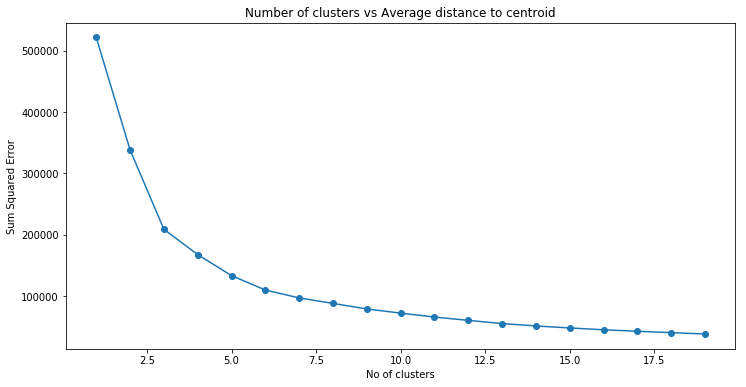

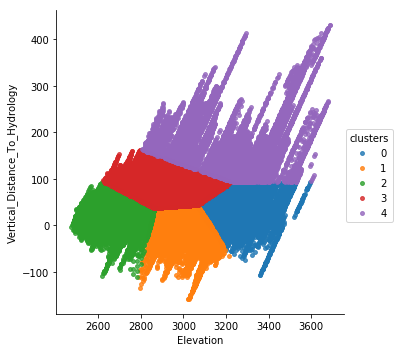

In [69]:
current_clmns = []

col1 = 0
col2 = 4

current_clmns.append(clmns[col1])
current_clmns.append(clmns[col2])

print (current_clmns)

df_tr_std = stats.zscore(df_tr[current_clmns])

#Elbow curve

cluster_range  = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( df_tr_std )
  cluster_errors.append( clusters.inertia_ )

#Print Elbow curve table
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
print (clusters_df[0:10])

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.title("Number of clusters vs Average distance to centroid")
plt.xlabel('No of clusters')
plt.ylabel('Sum Squared Error')

# Cluster the data based on best k
kmeans = KMeans(n_clusters=5, random_state=5).fit(df_tr_std)
labels = kmeans.labels_

#Glue back to original data
df_tr['clusters'] = labels

#Add the column into our list
current_clmns.extend(['clusters'])

#Lets analyze the clusters
#Find out how many instances in cluster
#print (df_tr[current_clmns].groupby(['clusters']).mean())

# Plot the graph
sns.lmplot(current_clmns[0], current_clmns[1], 
       data=df_tr, 
       fit_reg=False, 
       hue="clusters",  
       scatter_kws={"marker": "D", 
                    "s": 15})

# Confusion Matrix Result

model = cluster.KMeans(n_clusters = 5, random_state=5)

fit = model.fit(df_tr_std)
df_tr["cluster"] = fit.predict(df_tr_std)

#Then, we create the following two columns, to compare the predicted labels with the target labels. 
df_tr["c"] = "count"

# The following line includes three parts: we first select the cluster, target, and c columns. Then, we group them by the cluster and target columns. Finally, we aggregate the rows of the group with a simple count function. 

# Print confusion matrix
clustering_result = df_tr[["cluster", "Cover_Type", "c"]].groupby(["cluster", "Cover_Type"]).agg("count")
confusion_matrix = (clustering_result.reset_index().pivot_table(index='Cover_Type', columns='cluster', values='c', aggfunc='sum', fill_value=0))
print (confusion_matrix)

## GRAPH 5: Soil Type vs Vertical Distance to Hydrology

['Soil_Type', 'Vertical_Distance_To_Hydrology']
   cluster_errors  num_clusters
0   521592.000000             1
1   248089.399165             2
2   112122.901976             3
3    70921.665941             4
4    55039.646311             5
5    42066.262096             6
6    33737.971879             7
7    28462.027037             8
8    23808.668523             9
9    19390.583512            10
cluster         0      1      2     3
Cover_Type                           
1           41741  36695  21292  5989
2           77380  22683  39274  6860
5            1694    298   1309   480
7            3218    331   1116   436


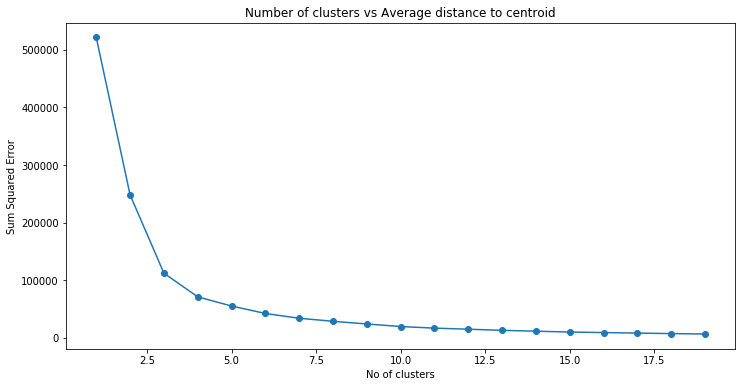

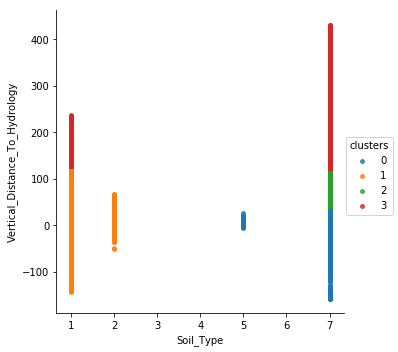

In [70]:
current_clmns = []

col1 = 11
col2 = 4

current_clmns.append(clmns[col1])
current_clmns.append(clmns[col2])

print (current_clmns)

df_tr_std = stats.zscore(df_tr[current_clmns])

#Elbow curve

cluster_range  = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( df_tr_std )
  cluster_errors.append( clusters.inertia_ )

#Print Elbow curve table
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
print (clusters_df[0:10])

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.title("Number of clusters vs Average distance to centroid")
plt.xlabel('No of clusters')
plt.ylabel('Sum Squared Error')

# Cluster the data based on best k
kmeans = KMeans(n_clusters=4, random_state=5).fit(df_tr_std)
labels = kmeans.labels_

#Glue back to original data
df_tr['clusters'] = labels

#Add the column into our list
current_clmns.extend(['clusters'])

#Lets analyze the clusters
#Find out how many instances in cluster
#print (df_tr[current_clmns].groupby(['clusters']).mean())

# Plot the graph
sns.lmplot(current_clmns[0], current_clmns[1], 
       data=df_tr, 
       fit_reg=False, 
       hue="clusters",  
       scatter_kws={"marker": "D", 
                    "s": 15})

# Confusion Matrix Result

model = cluster.KMeans(n_clusters = 4, random_state=5)

fit = model.fit(df_tr_std)
df_tr["cluster"] = fit.predict(df_tr_std)

#Then, we create the following two columns, to compare the predicted labels with the target labels. 
df_tr["c"] = "count"

# The following line includes three parts: we first select the cluster, target, and c columns. Then, we group them by the cluster and target columns. Finally, we aggregate the rows of the group with a simple count function. 

# Print confusion matrix
clustering_result = df_tr[["cluster", "Cover_Type", "c"]].groupby(["cluster", "Cover_Type"]).agg("count")
confusion_matrix = (clustering_result.reset_index().pivot_table(index='Cover_Type', columns='cluster', values='c', aggfunc='sum', fill_value=0))
print (confusion_matrix)

## GRAPH 6: Cover Type vs Horizontal Distance to Hydrology

['Cover_Type', 'Vertical_Distance_To_Hydrology']
   cluster_errors  num_clusters
0   521592.000000             1
1   333884.415369             2
2   183869.835368             3
3   129559.263990             4
4    93272.756912             5
5    77913.552935             6
6    64419.072696             7
7    55322.228616             8
8    48515.330805             9
9    41827.462788            10
cluster         0       1      2     3
Cover_Type                            
1           89599       0  16118     0
2               0  125024  21173     0
5               0       0     12  3769
7               0       0      0  5101


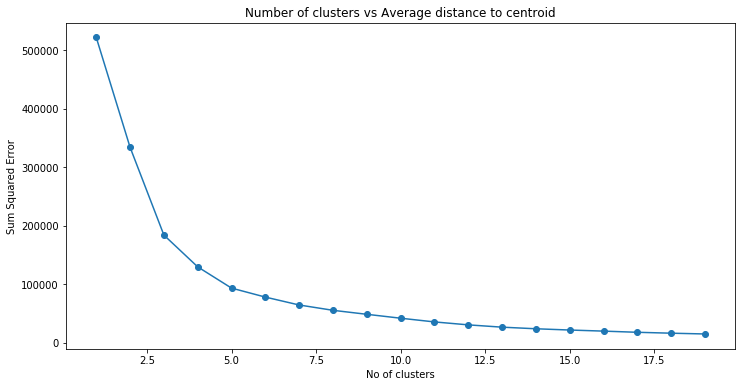

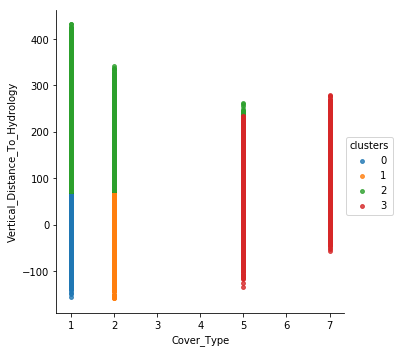

In [71]:
current_clmns = []

col1 = 9
col2 = 4

current_clmns.append(clmns[col1])
current_clmns.append(clmns[col2])

print (current_clmns)

df_tr_std = stats.zscore(df_tr[current_clmns])

#Elbow curve

cluster_range  = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( df_tr_std )
  cluster_errors.append( clusters.inertia_ )

#Print Elbow curve table
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
print (clusters_df[0:10])

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.title("Number of clusters vs Average distance to centroid")
plt.xlabel('No of clusters')
plt.ylabel('Sum Squared Error')

# Cluster the data based on best k
kmeans = KMeans(n_clusters=4, random_state=5).fit(df_tr_std)
labels = kmeans.labels_

#Glue back to original data
df_tr['clusters'] = labels

#Add the column into our list
current_clmns.extend(['clusters'])

#Lets analyze the clusters
#Find out how many instances in cluster
#print (df_tr[current_clmns].groupby(['clusters']).mean())

# Plot the graph
sns.lmplot(current_clmns[0], current_clmns[1], 
       data=df_tr, 
       fit_reg=False, 
       hue="clusters",  
       scatter_kws={"marker": "D", 
                    "s": 15})

# Confusion Matrix Result

model = cluster.KMeans(n_clusters = 4, random_state=5)

fit = model.fit(df_tr_std)
df_tr["cluster"] = fit.predict(df_tr_std)

#Then, we create the following two columns, to compare the predicted labels with the target labels. 
df_tr["c"] = "count"

# The following line includes three parts: we first select the cluster, target, and c columns. Then, we group them by the cluster and target columns. Finally, we aggregate the rows of the group with a simple count function. 

# Print confusion matrix
clustering_result = df_tr[["cluster", "Cover_Type", "c"]].groupby(["cluster", "Cover_Type"]).agg("count")
confusion_matrix = (clustering_result.reset_index().pivot_table(index='Cover_Type', columns='cluster', values='c', aggfunc='sum', fill_value=0))
print (confusion_matrix)

## GRAPH 7: Cover Type vs Horizontal Distance to Hydrology

['Cover_Type', 'Horizontal_Distance_To_Hydrology']
   cluster_errors  num_clusters
0   521592.000000             1
1   333504.560553             2
2   161835.728196             3
3   116207.135239             4
4    84377.546534             5
5    64258.360543             6
6    53132.956258             7
7    43757.348836             8
8    34628.513844             9
9    28755.880694            10
cluster         0       1      2     3
Cover_Type                            
1           78527       0  27190     0
2               0  104720  41477     0
5               0       0      0  3781
7               0       0      0  5101


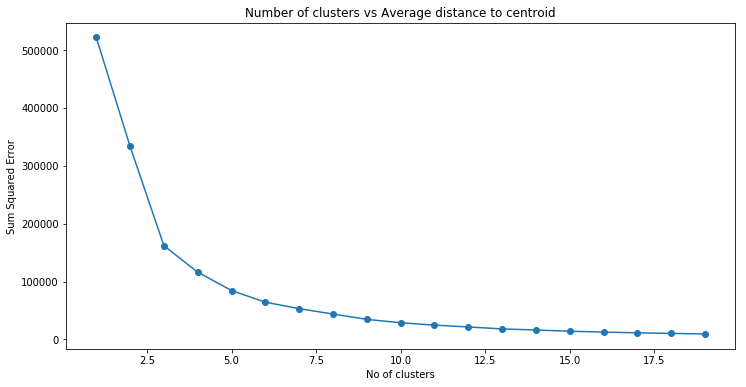

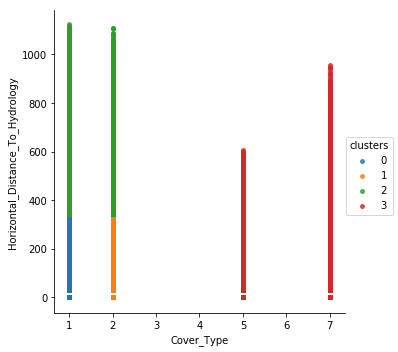

In [72]:
current_clmns = []

col1 = 9
col2 = 3

current_clmns.append(clmns[col1])
current_clmns.append(clmns[col2])

print (current_clmns)

df_tr_std = stats.zscore(df_tr[current_clmns])

#Elbow curve

cluster_range  = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( df_tr_std )
  cluster_errors.append( clusters.inertia_ )

#Print Elbow curve table
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
print (clusters_df[0:10])

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.title("Number of clusters vs Average distance to centroid")
plt.xlabel('No of clusters')
plt.ylabel('Sum Squared Error')

# Cluster the data based on best k
kmeans = KMeans(n_clusters=4, random_state=5).fit(df_tr_std)
labels = kmeans.labels_

#Glue back to original data
df_tr['clusters'] = labels

#Add the column into our list
current_clmns.extend(['clusters'])

#Lets analyze the clusters
#Find out how many instances in cluster
#print (df_tr[current_clmns].groupby(['clusters']).mean())

# Plot the graph
sns.lmplot(current_clmns[0], current_clmns[1], 
       data=df_tr, 
       fit_reg=False, 
       hue="clusters",  
       scatter_kws={"marker": "D", 
                    "s": 15})

# Confusion Matrix Result

model = cluster.KMeans(n_clusters = 4, random_state=5)

fit = model.fit(df_tr_std)
df_tr["cluster"] = fit.predict(df_tr_std)

#Then, we create the following two columns, to compare the predicted labels with the target labels. 
df_tr["c"] = "count"

# The following line includes three parts: we first select the cluster, target, and c columns. Then, we group them by the cluster and target columns. Finally, we aggregate the rows of the group with a simple count function. 

# Print confusion matrix
clustering_result = df_tr[["cluster", "Cover_Type", "c"]].groupby(["cluster", "Cover_Type"]).agg("count")
confusion_matrix = (clustering_result.reset_index().pivot_table(index='Cover_Type', columns='cluster', values='c', aggfunc='sum', fill_value=0))
print (confusion_matrix)

## GRAPH 8: Cover Type vs Vertical Distance to Roadways

['Cover_Type', 'Horizontal_Distance_To_Roadways']
   cluster_errors  num_clusters
0   521592.000000             1
1   320817.056811             2
2   142460.566044             3
3   106866.509092             4
4    77704.859852             5
5    57253.141786             6
6    43113.899527             7
7    31204.154121             8
8    24160.463670             9
9    19892.077477            10
cluster         0      1     2      3
Cover_Type                           
1           64059  41658     0      0
2               0  70863     0  75334
5               0      0  3781      0
7               0      0  5101      0


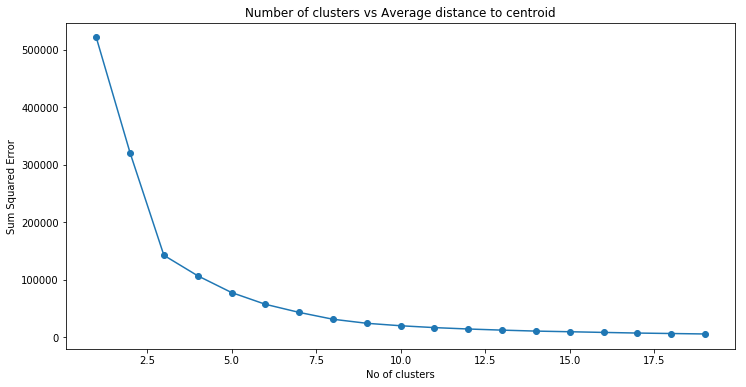

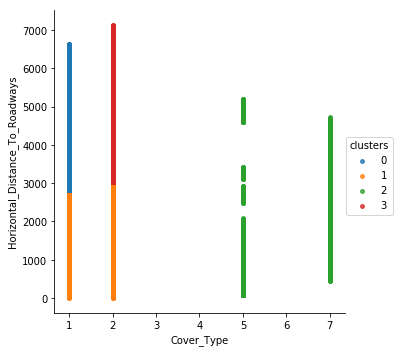

In [73]:
current_clmns = []

col1 = 9
col2 = 5

current_clmns.append(clmns[col1])
current_clmns.append(clmns[col2])

print (current_clmns)

df_tr_std = stats.zscore(df_tr[current_clmns])

#Elbow curve

cluster_range  = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( df_tr_std )
  cluster_errors.append( clusters.inertia_ )

#Print Elbow curve table
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
print (clusters_df[0:10])

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.title("Number of clusters vs Average distance to centroid")
plt.xlabel('No of clusters')
plt.ylabel('Sum Squared Error')

# Cluster the data based on best k
kmeans = KMeans(n_clusters=4, random_state=5).fit(df_tr_std)
labels = kmeans.labels_

#Glue back to original data
df_tr['clusters'] = labels

#Add the column into our list
current_clmns.extend(['clusters'])

#Lets analyze the clusters
#Find out how many instances in cluster
#print (df_tr[current_clmns].groupby(['clusters']).mean())

# Plot the graph
sns.lmplot(current_clmns[0], current_clmns[1], 
       data=df_tr, 
       fit_reg=False, 
       hue="clusters",  
       scatter_kws={"marker": "D", 
                    "s": 15})

# Confusion Matrix Result

model = cluster.KMeans(n_clusters = 4, random_state=5)

fit = model.fit(df_tr_std)
df_tr["cluster"] = fit.predict(df_tr_std)

#Then, we create the following two columns, to compare the predicted labels with the target labels. 
df_tr["c"] = "count"

# The following line includes three parts: we first select the cluster, target, and c columns. Then, we group them by the cluster and target columns. Finally, we aggregate the rows of the group with a simple count function. 

# Print confusion matrix
clustering_result = df_tr[["cluster", "Cover_Type", "c"]].groupby(["cluster", "Cover_Type"]).agg("count")
confusion_matrix = (clustering_result.reset_index().pivot_table(index='Cover_Type', columns='cluster', values='c', aggfunc='sum', fill_value=0))
print (confusion_matrix)